# Case Study : Telecom Churn

### Business Goal:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Imports

In [1]:
#Install imblearn for SMOTE
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [3]:
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#View all max columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 300)

## Data Understanding and Cleaning

In [4]:
#read the data file
telecom = pd.read_csv('telecom_churn_data.csv')

In [5]:
#view the dataframe
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
#check the statistics of numerical columns
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
#check columns datatype and null values
telecom.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [8]:
#There appears to be null data
#nullcheck function
def null_check(df,threshold=0):
    null_series = (round((df.isnull().sum()/len(df.index))*100,2))
    return null_series[null_series > threshold]

In [9]:
#Check columns with null values
null_check(telecom)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

In [10]:
#fb_user and night_pck_user
telecom[['fb_user_6','night_pck_user_6']].describe()

fb_user_6  night_pck_user_6
count  25153.000000      25153.000000
mean       0.914404          0.025086
std        0.279772          0.156391
min        0.000000          0.000000
25%        1.000000          0.000000
50%        1.000000          0.000000
75%        1.000000          0.000000
max        1.000000          1.000000

### Do the following Imputation/Removal Operations:

### Impute:

#### Continuous Variables
1. We can observe that the percentage null values of the column **date_of_last_rech_data_* coincides with ( total_rech_data_* , max_rech_data_* , count_rech_2g_* , count_rech_3g_* , av_rech_amt_data_* , arpu_2g_* , arpu_3g_* )** for their respective months. This indicates that the user didnt recharge for that month. We can replace the recharge/Revenue columns having NA with 0. As NA would indicate that no recharge has happened, hence zero. 
    - total_rech_data_6
    - total_rech_data_7
    - total_rech_data_8
    - total_rech_data_9
    
    - max_rech_data_6
    - max_rech_data_7
    - max_rech_data_8
    - max_rech_data_9

    - count_rech_2g_6
    - count_rech_2g_7
    - count_rech_2g_8
    - count_rech_2g_9

    - count_rech_3g_6
    - count_rech_3g_7
    - count_rech_3g_8
    - count_rech_3g_9

    - av_rech_amt_data_6
    - av_rech_amt_data_7
    - av_rech_amt_data_8
    - av_rech_amt_data_9

    - arpu_3g_6
    - arpu_3g_7
    - arpu_3g_8
    - arpu_3g_9
    
    - arpu_2g_6
    - arpu_2g_7
    - arpu_2g_8
    - arpu_2g_9
    
#### Categorical variables:
2. Even though night_pck_user_* and fb_user_* coincide with the date_of_last_rech_data_* , they are binary columns indicating 0/1 and imputing with 0 will distort the data. Hence we can impute with -1/99 as a new category. Let's use -1 as new category.
    - night_pck_user_6
    - night_pck_user_7
    - night_pck_user_8
    - night_pck_user_9
    
    - fb_user_6
    - fb_user_7
    - fb_user_8
    - fb_user_9

In [11]:
#make a copy of the original data
telecom_clean = telecom.copy()

In [12]:
#Continuous Variable Imputation
continuous_imputation_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                                 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
                                 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9' ]

telecom_clean[continuous_imputation_columns] = telecom[continuous_imputation_columns].fillna(0)

In [13]:
#Categorical Variable Imputation
categorical_imputation_columns = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
                                  'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', ]
telecom_clean[categorical_imputation_columns] = telecom_clean[categorical_imputation_columns].fillna(-1)

In [14]:
#View Null Data after imputation
null_check(telecom_clean)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

### Dropping columns:

Some of the columns cannot be used for modelling like circle_id,mobile_number and also date columns like last_date_of_month_* , date_of_last_rech_* , date_of_last_rech_data_* . Hence dropping such columns.

    - circle_id
    - mobile_number
    
    - last_date_of_month_6
    - last_date_of_month_7
    - last_date_of_month_8
    - last_date_of_month_9
    
    - date_of_last_rech_6
    - date_of_last_rech_7
    - date_of_last_rech_8
    - date_of_last_rech_9
        
    - date_of_last_rech_data_6
    - date_of_last_rech_data_7
    - date_of_last_rech_data_8
    - date_of_last_rech_data_9

In [15]:
#Dropping the columns mentioned above
dropped_columns = ['circle_id', 'mobile_number',
                   'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
                   'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
                   'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
telecom_clean = telecom_clean.drop(dropped_columns,axis=1)

In [16]:
#Checking null values
null_columns = null_check(telecom_clean).index

In [17]:
#Check null values more than 5% of data
null_check(telecom_clean,5)

onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75
std_og_t2m_mou_8    5.38
std_og_t2m_mou_9    7.75
std_og_t2f_mou_8    5.38
std_og_t2f_mou_9    7.75
std_og_t2c_mou_8    5.38
std_og_t2c_mou_9    7.75
std_og_mou_8        5.38
std_og_mou_9        7.75
isd_og_mou_8        5.38
isd_og_mou_9        7.75
spl_og_mou_8        5.38
spl_og_mou_9        7.75
og_others_8         5.38
og_others_9         7.75
loc_ic_t2t_mou_8    5.38
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_8    5.38
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_8    5.38
loc_ic_t2f_mou_9    7.75


In [18]:
#Check null values more than 10% of data
null_check(telecom_clean,10)

Series([], dtype: float64)

We can see that there is a maximum of 7.75% null data in the columns. We can use Mean/Median to impute these values.

But before this we need to drop columns with no information,i.e, variance = standard deviation = 0

In [19]:
#Check columns with zero variance/standard deviation
telecom_clean.loc[:,(telecom_clean.std() == 0).values].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  std_og_t2c_mou_6  \
count         98981.0         98981.0         98981.0           96062.0   
mean              0.0             0.0             0.0               0.0   
std               0.0             0.0             0.0               0.0   
min               0.0             0.0             0.0               0.0   
25%               0.0             0.0             0.0               0.0   
50%               0.0             0.0             0.0               0.0   
75%               0.0             0.0             0.0               0.0   
max               0.0             0.0             0.0               0.0   

       std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_ic_t2o_mou_6  \
count           96140.0           94621.0           92254.0           96062.0   
mean                0.0               0.0               0.0               0.0   
std                 0.0               0.0               0.0               0.0   
min                 0.0               0.0               0.0               0.0   
25%                 0.0               0.0               0.0               0.0   
50%                 0.0               0.0               0.0               0.0   
75%                 0.0               0.0               0.0               0.0   
max                 0.0               0.0               0.0               0.0   

       std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  
count           96140.0           94621.0           92254.0  
mean                0.0               0.0               0.0  
std                 0.0               0.0               0.0  
min                 0.0               0.0               0.0  
25%                 0.0               0.0               0.0  
50%                 0.0               0.0               0.0  
75%                 0.0               0.0               0.0  
max                 0.0               0.0               0.0

In [20]:
# We need to drop the following columns
zero_variance_columns = telecom_clean.loc[:,(telecom_clean.std() == 0).values].columns

zero_variance_columns.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], dtype=object)

In [21]:
#Dropping columns
telecom_clean = telecom_clean.drop(zero_variance_columns.values,axis=1)

In [22]:
#Check null percentage again
null_check(telecom_clean)

onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_6    3.94
std_og_t2t_mou_7    3.86
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75


In [23]:
#viewing summary statistics
telecom_clean.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000   
mean     282.987358    278.536648    279.154731    261.645069    132.395875   
std      328.439770    338.156291    344.474791    341.998630    297.207406   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      7.380000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
75%      371.060000    365.344500    369.370500    353.466500    118.740000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.2400

Before we impute the missing values lets filter out the high value customers as by imputing now we are considering a different dataset as compared to after filtering causing us to use a wrong median value.

### Strategy/Steps to Calculate High Value Users

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

Total Recharged Amount in a month = (Total Recharge Amount) + (Total Recharge Data * Average Recharge Amount Data)


Average Recharge amount in first two months = (Total Recharged Amount in Month 1 + Total Recharged Amount in Month 2)/2

High Value Users = Users with Average Recharge amount in first two months > 70 percentile value of Average Recharge amount in first two months

In [24]:
#Total Recharged Amount in a month = (Total Recharge Amount) + (Total Recharge Data * Average Recharge Amount Data)
telecom_clean['total_amt_6'] = telecom_clean['total_rech_amt_6'] + (telecom_clean['total_rech_data_6'] * telecom_clean['av_rech_amt_data_6'])

telecom_clean['total_amt_7'] = telecom_clean['total_rech_amt_7'] + (telecom_clean['total_rech_data_7'] * telecom_clean['av_rech_amt_data_7'])

In [25]:
#Average Recharge amount in first two months = (Total Recharged Amount in Month 1 + Total Recharged Amount in Month 2)/2
telecom_clean['av_amt_good_phase'] = (telecom_clean['total_amt_6'] + telecom_clean['total_amt_7'])/2

In [26]:
#High Value Users = Users with Average Recharge amount in first two months > 70 percentile value of Average Recharge amount 
#in first two months
telecom_high = telecom_clean[telecom_clean['av_amt_good_phase'] > np.quantile(telecom_clean['av_amt_good_phase'],0.7)]

In [27]:
#Remove the newly created columns
telecom_high = telecom_high.drop(['total_amt_6','total_amt_7','av_amt_good_phase'],axis=1)

In [28]:
#Check the number of values left
telecom_high.shape

(29953, 201)

In [29]:
#Checking the null values
null_columns = null_check(telecom_high).index
null_columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=108)

In [30]:
#Check statistics summary
telecom_high.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29411.000000   
mean     558.820058    561.160547    508.890301    467.446183    265.708886   
std      460.868223    480.028497    502.136278    501.837624    462.692744   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%      310.142000    310.071000    231.615000    189.750000     19.250000   
50%      482.354000    481.496000    427.604000    388.093000     88.140000   
75%      700.240000    698.829000    661.753000    626.637000    297.490000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  29417.000000  28781.000000  28055.000000  29411.000000  29417.000000   
mean     272.935850    243.888097    226.027951    380.688975    385.124799   
std      483.282132    465.505577    447.494695    484.441095    501.024091   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.180000     14.280000     11.440000     78.550000     76.180000   
50%       86.890000     72.990000     65.430000    229.630000    227.130000   
75%      298.380000    255.310000    230.260000    494.755000    500.480000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  28781.000000  28055.000000   29411.000000   29417.000000   
mean     348.769656    323.826598      16.421142      12.876567   
std      486.836956    455.662109      77.012820      76.501945   
min        0.000000      0.000000       0.000000       0.000000   
25%       58.760000     49.625000       0.000000       0.000000   
50%      197.690000    178.290000       0.000000       0.000000   
75%      455.440000    419.965000       0.000000       0.000000   
max    14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   28781.000000   28055.000000   29411.000000   29417.000000   
mean       13.021785      11.255702      27.086158      20.522376   
std        75.630647      69.181558     117.284108      96.967183   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   28781.000000   28055.000000      29411.000000      29417.000000   
mean       20.699213      16.876168         86.132694         87.325499   
std       106.833757      91.421303        230.772468        242.604091   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.030000          5.290000   
50%         0.000000       0.000000         25.590000         25.790000   
75%         0.000000       0.000000         79.870000         80.440000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      28781.000000      28055.000000      29411.000000      29417.000000   
mean          81.335840         77.978958        166.319093        166.059185   
std          231.568708        230.254066        251.520947        242.861350   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.840000          3.260000         21.130000         22.940000   
50%           23.260000         21.760000         80.340000         81.740000   
75%           76.110000         73.250000        212.485000        211.810000   
max        10752.560000      10389.2400

In [31]:
#Fill null values with their respective median values
telecom_high.fillna(telecom_high.median(),inplace=True)

In [32]:
#Check Info and Null Values
telecom_high.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 201 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              29953 non-null  float64
 1   arpu_7              29953 non-null  float64
 2   arpu_8              29953 non-null  float64
 3   arpu_9              29953 non-null  float64
 4   onnet_mou_6         29953 non-null  float64
 5   onnet_mou_7         29953 non-null  float64
 6   onnet_mou_8         29953 non-null  float64
 7   onnet_mou_9         29953 non-null  float64
 8   offnet_mou_6        29953 non-null  float64
 9   offnet_mou_7        29953 non-null  float64
 10  offnet_mou_8        29953 non-null  float64
 11  offnet_mou_9        29953 non-null  float64
 12  roam_ic_mou_6       29953 non-null  float64
 13  roam_ic_mou_7       29953 non-null  float64
 14  roam_ic_mou_8       29953 non-null  float64
 15  roam_ic_mou_9       29953 non-null  float64
 16  roa

We can see that there are no null values now. Also all the values are numerical so we can easily apply various models

In [33]:
#Check statistics summary
telecom_high.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     558.820058    561.160547    508.890301    467.446183    262.495774   
std      460.868223    480.028497    502.136278    501.837624    459.097839   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%      310.142000    310.071000    231.615000    189.750000     20.010000   
50%      482.354000    481.496000    427.604000    388.093000     88.140000   
75%      700.240000    698.829000    661.753000    626.637000    290.490000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     269.606615    237.201202    215.851511    377.955560    382.297529   
std      479.573030    457.508915    434.847974    480.460077    496.962459   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.940000     15.660000     13.540000     80.690000     78.610000   
50%       86.890000     72.990000     65.430000    229.630000    227.130000   
75%      290.540000    240.630000    209.330000    487.910000    494.030000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29953.000000  29953.000000   29953.000000   29953.000000   
mean     342.858216    314.604535      16.124001      12.646145   
std      478.115432    442.411710      76.344227      75.833558   
min        0.000000      0.000000       0.000000       0.000000   
25%       63.230000     56.380000       0.000000       0.000000   
50%      197.690000    178.290000       0.000000       0.000000   
75%      438.860000    397.040000       0.000000       0.000000   
max    14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   29953.000000   29953.000000   29953.000000   29953.000000   
mean       12.512269      10.542474      26.596033      20.155134   
std        74.179181      67.009868     116.274169      96.134144   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29953.000000   29953.000000      29953.000000      29953.000000   
mean       19.889295      15.806793         85.037173         86.224340   
std       104.799622      88.572782        228.817308        240.561917   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.240000          5.540000   
50%         0.000000       0.000000         25.590000         25.790000   
75%         0.000000       0.000000         78.060000         78.510000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count       29953.00000      29953.000000      29953.000000      29953.000000   
mean           79.06345         74.416591        164.763300        164.550318   
std           227.27210        223.259811        249.498211        240.937949   
min             0.00000          0.000000          0.000000          0.000000   
25%             4.36000          3.990000         21.810000         23.730000   
50%            23.26000         21.760000         80.340000         81.740000   
75%            72.13000         67.390000        209.030000        208.530000   
max         10752.56000      10389.2400

## Data Preparation

We need to derive the dependent variable based on the **churn** phase data which is month 9. The total incoming calls ,total outgoing calls , volume of 2g,3g data in mb will be useful in determining the churn. If the columns mentioned before are zero it would indicate that the customer has churned and hence we can give churn as 1.

In [34]:
#View the columns ending with 9
col_9 = [column for column in telecom_high.columns.values if column.split('_')[-1] == '9']
col_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [35]:
#Statistics of the churn phase
telecom_high[col_9].describe()

arpu_9   onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  \
count  29953.000000  29953.000000  29953.000000   29953.000000   29953.000000   
mean     467.446183    215.851511    314.604535      10.542474      15.806793   
std      501.837624    434.847974    442.411710      67.009868      88.572782   
min    -1899.505000      0.000000      0.000000       0.000000       0.000000   
25%      189.750000     13.540000     56.380000       0.000000       0.000000   
50%      388.093000     65.430000    178.290000       0.000000       0.000000   
75%      626.637000    209.330000    397.040000       0.000000       0.000000   
max    38805.617000  10427.460000  10310.760000    3220.660000    4428.460000   

       loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
count      29953.000000      29953.000000      29953.000000      29953.000000   
mean          74.416591        148.128778          5.767122          1.435863   
std          223.259811        230.534790         19.764688          6.183477   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.990000         18.010000          0.000000          0.000000   
50%           21.760000         71.280000          0.000000          0.000000   
75%           67.390000        182.690000          3.580000          0.000000   
max        10389.240000       4429.880000        927.410000        274.890000   

       loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
count  29953.000000      29953.000000      29953.000000      29953.000000   
mean     229.736263        132.408792        138.140832          1.518015   
std      358.660311        373.074205        365.892149         11.437201   
min        0.000000          0.000000          0.000000          0.000000   
25%       30.330000          0.000000          0.000000          0.000000   
50%      115.390000          0.810000          9.840000          0.000000   
75%      288.410000         62.680000         96.190000          0.000000   
max    11099.260000       7244.160000      10223.430000        808.490000   

       std_og_mou_9  isd_og_mou_9  spl_og_mou_9   og_others_9  total_og_mou_9  \
count  29953.000000  29953.000000  29953.000000  29953.000000    29953.000000   
mean     273.084000      1.697907      5.551761      0.089160      501.141639   
std      561.598588     36.592424     17.819300      5.654212      667.138160   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000       47.730000   
50%       26.640000      0.000000      0.390000      0.000000      285.130000   
75%      293.390000      0.000000      4.840000      0.000000      698.790000   
max    11495.310000   4244.530000   1069.090000    787.790000    11517.730000   

       loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  \
count      29953.000000      29953.000000      29953.000000  29953.000000   
mean          60.933601        143.255374         14.770424    220.420851   
std          161.611325        203.932651         48.683107    301.628214   
min            0.000000          0.000000          0.000000      0.000000   
25%            6.830000         30.380000          0.000000     51.410000   
50%           23.980000         82.930000          1.980000    131.810000   
75%           60.630000        175.610000         10.740000    273.840000   
max         7565.890000       4534.790000       2167.910000   7785.460000   

       std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  \
count      29953.000000      29953.000000      29953.000000  29953.000000   
mean          13.140737         25.559195          2.573833     41.609011   
std           69.803755         92.298056         19.589530    129.888921   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000         

In [36]:
#Deriving the churn variable
telecom_high['churn'] = telecom_high.apply(lambda x: 1 
                                             if(x.total_ic_mou_9==0 and
                                                x.total_og_mou_9==0 and
                                                x.vol_2g_mb_9==0 and
                                                x.vol_3g_mb_9==0)
                                             else 0,axis=1)

In [37]:
#Viewing the churn count
telecom_high.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

The data seems to be highly imbalanced.

Also all the columns churn phase related( _9 ) need to be removed.

In [38]:
#Remove churn phase columns
telecom_final = telecom_high.drop(col_9,axis=1)

In [39]:
#Check the shape of dataframe
telecom_final.shape

(29953, 153)

### Outlier Treatment

In [40]:
#Lets look at the 1 and 99 percentile data
telecom_final.describe(percentiles=[0.01,0.25,0.5,0.75,0.95,0.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     558.820058    561.160547    508.890301    262.495774    269.606615   
std      460.868223    480.028497    502.136278    459.097839    479.573030   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
1%         1.272400      0.726000      0.000000      0.000000      0.000000   
25%      310.142000    310.071000    231.615000     20.010000     18.940000   
50%      482.354000    481.496000    427.604000     88.140000     86.890000   
75%      700.240000    698.829000    661.753000    290.490000    290.540000   
95%     1241.649400   1261.885600   1255.086400   1135.808000   1187.712000   
99%     1985.394360   1999.521120   1986.739600   2153.717600   2202.857600   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000   29953.000000   
mean     237.201202    377.955560    382.297529    342.858216      16.124001   
std      457.508915    480.460077    496.962459    478.115432      76.344227   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
25%       15.660000     80.690000     78.610000     63.230000       0.000000   
50%       72.990000    229.630000    227.130000    197.690000       0.000000   
75%      240.630000    487.910000    494.030000    438.860000       0.000000   
95%     1075.384000   1256.662000   1272.430000   1167.620000      84.628000   
99%     2159.676400   2330.358400   2411.139600   2191.731200     343.563200   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29953.000000   29953.000000   29953.000000   29953.000000   
mean       12.646145      12.512269      26.596033      20.155134   
std        75.833558      74.179181     116.274169      96.134144   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        55.640000      56.362000     145.562000     104.316000   
99%       281.194400     282.689200     531.348400     437.784000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29953.000000      29953.000000      29953.000000       29953.00000   
mean       19.889295         85.037173         86.224340          79.06345   
std       104.799622        228.817308        240.561917         227.27210   
min         0.000000          0.000000          0.000000           0.00000   
1%          0.000000          0.000000          0.000000           0.00000   
25%         0.000000          5.240000          5.540000           4.36000   
50%         0.000000         25.590000         25.790000          23.26000   
75%         0.000000         78.060000         78.510000          72.13000   
95%       100.692000        322.848000        324.650000         299.54200   
99%       427.068400       1006.729600       1019.034000         913.85800   
max      5337.040000       6431.330000       7400.660000       10752.56000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29953.000000      29953.000000      29953.000000      29953.000000   
mean         164.763300        164.550318        154.731350          6.350337   
std          249.498211        240.937949        232.291845         22.138980   
min          

In [41]:
#Since there seems to be some outliers. Let's cap the outliers rather than removing them.
cat_columns = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','churn'] 

#Lets use 3-sigma rule to cap outliers.
#This way the 99.7% of data is unchanged and only 1.5% of data on either sides of mean is changed.

def three_sigma_outlier(column_data):
    mean = column_data.mean()
    std = column_data.std()
    upper_cap = mean + 3*std
    lower_cap = mean - 3*std
    column_data = column_data.apply(lambda x: upper_cap if x > upper_cap else (lower_cap if x < lower_cap else x))
    return column_data

telecom_final[telecom_final.columns.difference(cat_columns)] = telecom_final[telecom_final.columns.difference(cat_columns)].apply(three_sigma_outlier,axis=0)
cat_columns.remove('churn')

### Handle categorical values and create dummies

In [42]:
#We also need to handle categorical values
mapping = {0.0:'no',1.0:'yes',-1.0:'NoRech'}
for column in cat_columns:
    telecom_final[column] = telecom_final[column].map(mapping)    

In [43]:
#Generating dummy variables from categories

telecom_final = pd.get_dummies(telecom_final,columns=cat_columns)

In [44]:
#We are using n-1 categories for n available categories/levels
#Remove NoRech columns
cat_columns_norech = list(map(lambda x: x+'_NoRech',cat_columns))
telecom_final = telecom_final.drop(cat_columns_norech,axis=1)

### Derived Metrics

We can do the following to derive metrics
- Change of various metric values between action phase(8) and good phase(6,7) which will help us determine whether the customer will churn or not

In [45]:
#the columns on which we observe the change between good and action phase are:
col_prefix_list = [('_').join(column.split('_')[:-1]) for column in telecom_final.columns.values if column.split('_')[-1] == '6']
col_prefix_list

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g']

In [46]:
#Calculate the percentage increase from month 6,7 to month 8
for column_prefix in col_prefix_list:
    average_6_7 = (telecom_final[column_prefix+'_6']+telecom_final[column_prefix+'_7'])/2
    telecom_final[column_prefix+'_change'] = telecom_final[column_prefix+'_8'] - average_6_7

In [47]:
#Viewing the summary statisctics of the derived columns
column_change = list(map(lambda x: x+'_change',col_prefix_list))
telecom_final[column_change].describe()

arpu_change  onnet_mou_change  offnet_mou_change  roam_ic_mou_change  \
count  29953.000000      29953.000000       29953.000000        29953.000000   
mean     -51.126135        -29.922196         -37.369430           -1.532263   
std      291.030019        231.541719         264.736134           33.984738   
min    -1971.335383      -1674.057498       -1845.830348         -242.651751   
25%     -177.948500        -52.480000         -97.610000            0.000000   
50%      -39.329000         -3.890000         -12.225000            0.000000   
75%       82.985000         21.500000          46.295000            0.000000   
max     2467.012635       1591.062946        1696.730000          235.049813   

       roam_og_mou_change  loc_og_t2t_mou_change  loc_og_t2m_mou_change  \
count        29953.000000           29953.000000           29953.000000   
mean            -2.882364              -5.375195              -9.449358   
std             52.194528              74.817737             111.526360   
min           -341.988053            -789.699594            -900.311049   
25%              0.000000             -16.600000             -39.580000   
50%              0.000000              -1.240000              -3.505000   
75%              0.000000               9.660000              24.400000   
max            334.288160             744.364750             840.751885   

       loc_og_t2f_mou_change  loc_og_t2c_mou_change  loc_og_mou_change  \
count           29953.000000           29953.000000       29953.000000   
mean               -0.448252              -0.029440         -15.404954   
std                 7.587128               4.179780         164.219417   
min               -72.532924             -24.910707       -1384.788455   
25%                -1.245000              -0.355000         -59.720000   
50%                 0.000000               0.000000          -5.535000   
75%                 0.180000               0.000000          34.540000   
max                62.130642              23.144707        1286.031613   

       std_og_t2t_mou_change  std_og_t2m_mou_change  std_og_t2f_mou_change  \
count           29953.000000           29953.000000           29953.000000   
mean              -22.813558             -25.995802              -0.165605   
std               194.426557             202.344200               3.678151   
min             -1408.315997           -1448.048303             -39.286113   
25%               -12.750000             -26.530000               0.000000   
50%                 0.000000              -0.230000               0.000000   
75%                 0.780000               4.910000               0.000000   
max              1335.100992            1384.376720              34.407168   

       std_og_mou_change  isd_og_mou_change  spl_og_mou_change  \
count       29953.000000       29953.000000       29953.000000   
mean          -49.966835          -0.189178           0.025138   
std           337.297195           6.490577          10.746324   
min         -2228.585825        -139.347702         -65.488786   
25%           -55.445000           0.000000          -2.698786   
50%            -0.650000           0.000000           0.000000   
75%             9.690000           0.000000           1.350000   
max          2108.914658         135.870386          67.420979   

       og_others_change  total_og_mou_change  loc_ic_t2t_mou_change  \
count      29953.000000         29953.000000           29953.000000   
mean          -0.294154           -69.243902              -2.905602   
std            0.884729           429.454179              54.490935   
min           -9.542143         -2732.510590            -545.751441   
25%            0.000000          -164.170000             -14.965000   
50%            0.000000           -14.965000              -1.220000   
75%            0.000000            66.370000              10.495000   
max           10.011034          2653.686038             530.605719   

      

In [48]:
#Final shape of the dataframe
telecom_final.shape

(29953, 206)

In [49]:
#Final null values of dataframe
null_check(telecom_final)

Series([], dtype: float64)

In [50]:
telecom_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 206 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   arpu_6                   float64
 1   arpu_7                   float64
 2   arpu_8                   float64
 3   onnet_mou_6              float64
 4   onnet_mou_7              float64
 5   onnet_mou_8              float64
 6   offnet_mou_6             float64
 7   offnet_mou_7             float64
 8   offnet_mou_8             float64
 9   roam_ic_mou_6            float64
 10  roam_ic_mou_7            float64
 11  roam_ic_mou_8            float64
 12  roam_og_mou_6            float64
 13  roam_og_mou_7            float64
 14  roam_og_mou_8            float64
 15  loc_og_t2t_mou_6         float64
 16  loc_og_t2t_mou_7         float64
 17  loc_og_t2t_mou_8         float64
 18  loc_og_t2m_mou_6         float64
 19  loc_og_t2m_mou_7         float64
 20  loc_og_t2m_mou_8         float64
 21  loc_og_t2f_

No null values for 29953 rows and 206 columns. Next Step is EDA.

## Data Visualization

In [51]:
#for better value recognition
sns.set_style('ticks')
#A personal favourite combination of styles
import matplotlib.style as style
style.use('ggplot')
style.use('seaborn-talk')
style.use('seaborn-colorblind')
sns.set_context('talk')

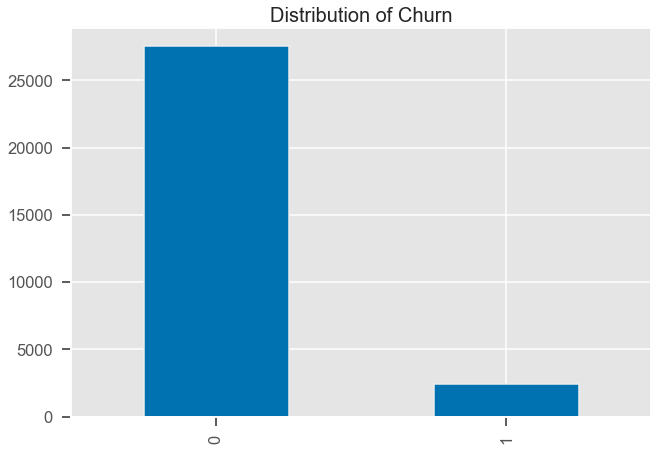

In [52]:
#Visualizing the target variable - Churn
fig = telecom_final.churn.value_counts().plot.bar()
fig.set_title('Distribution of Churn',fontsize=20)
plt.show()

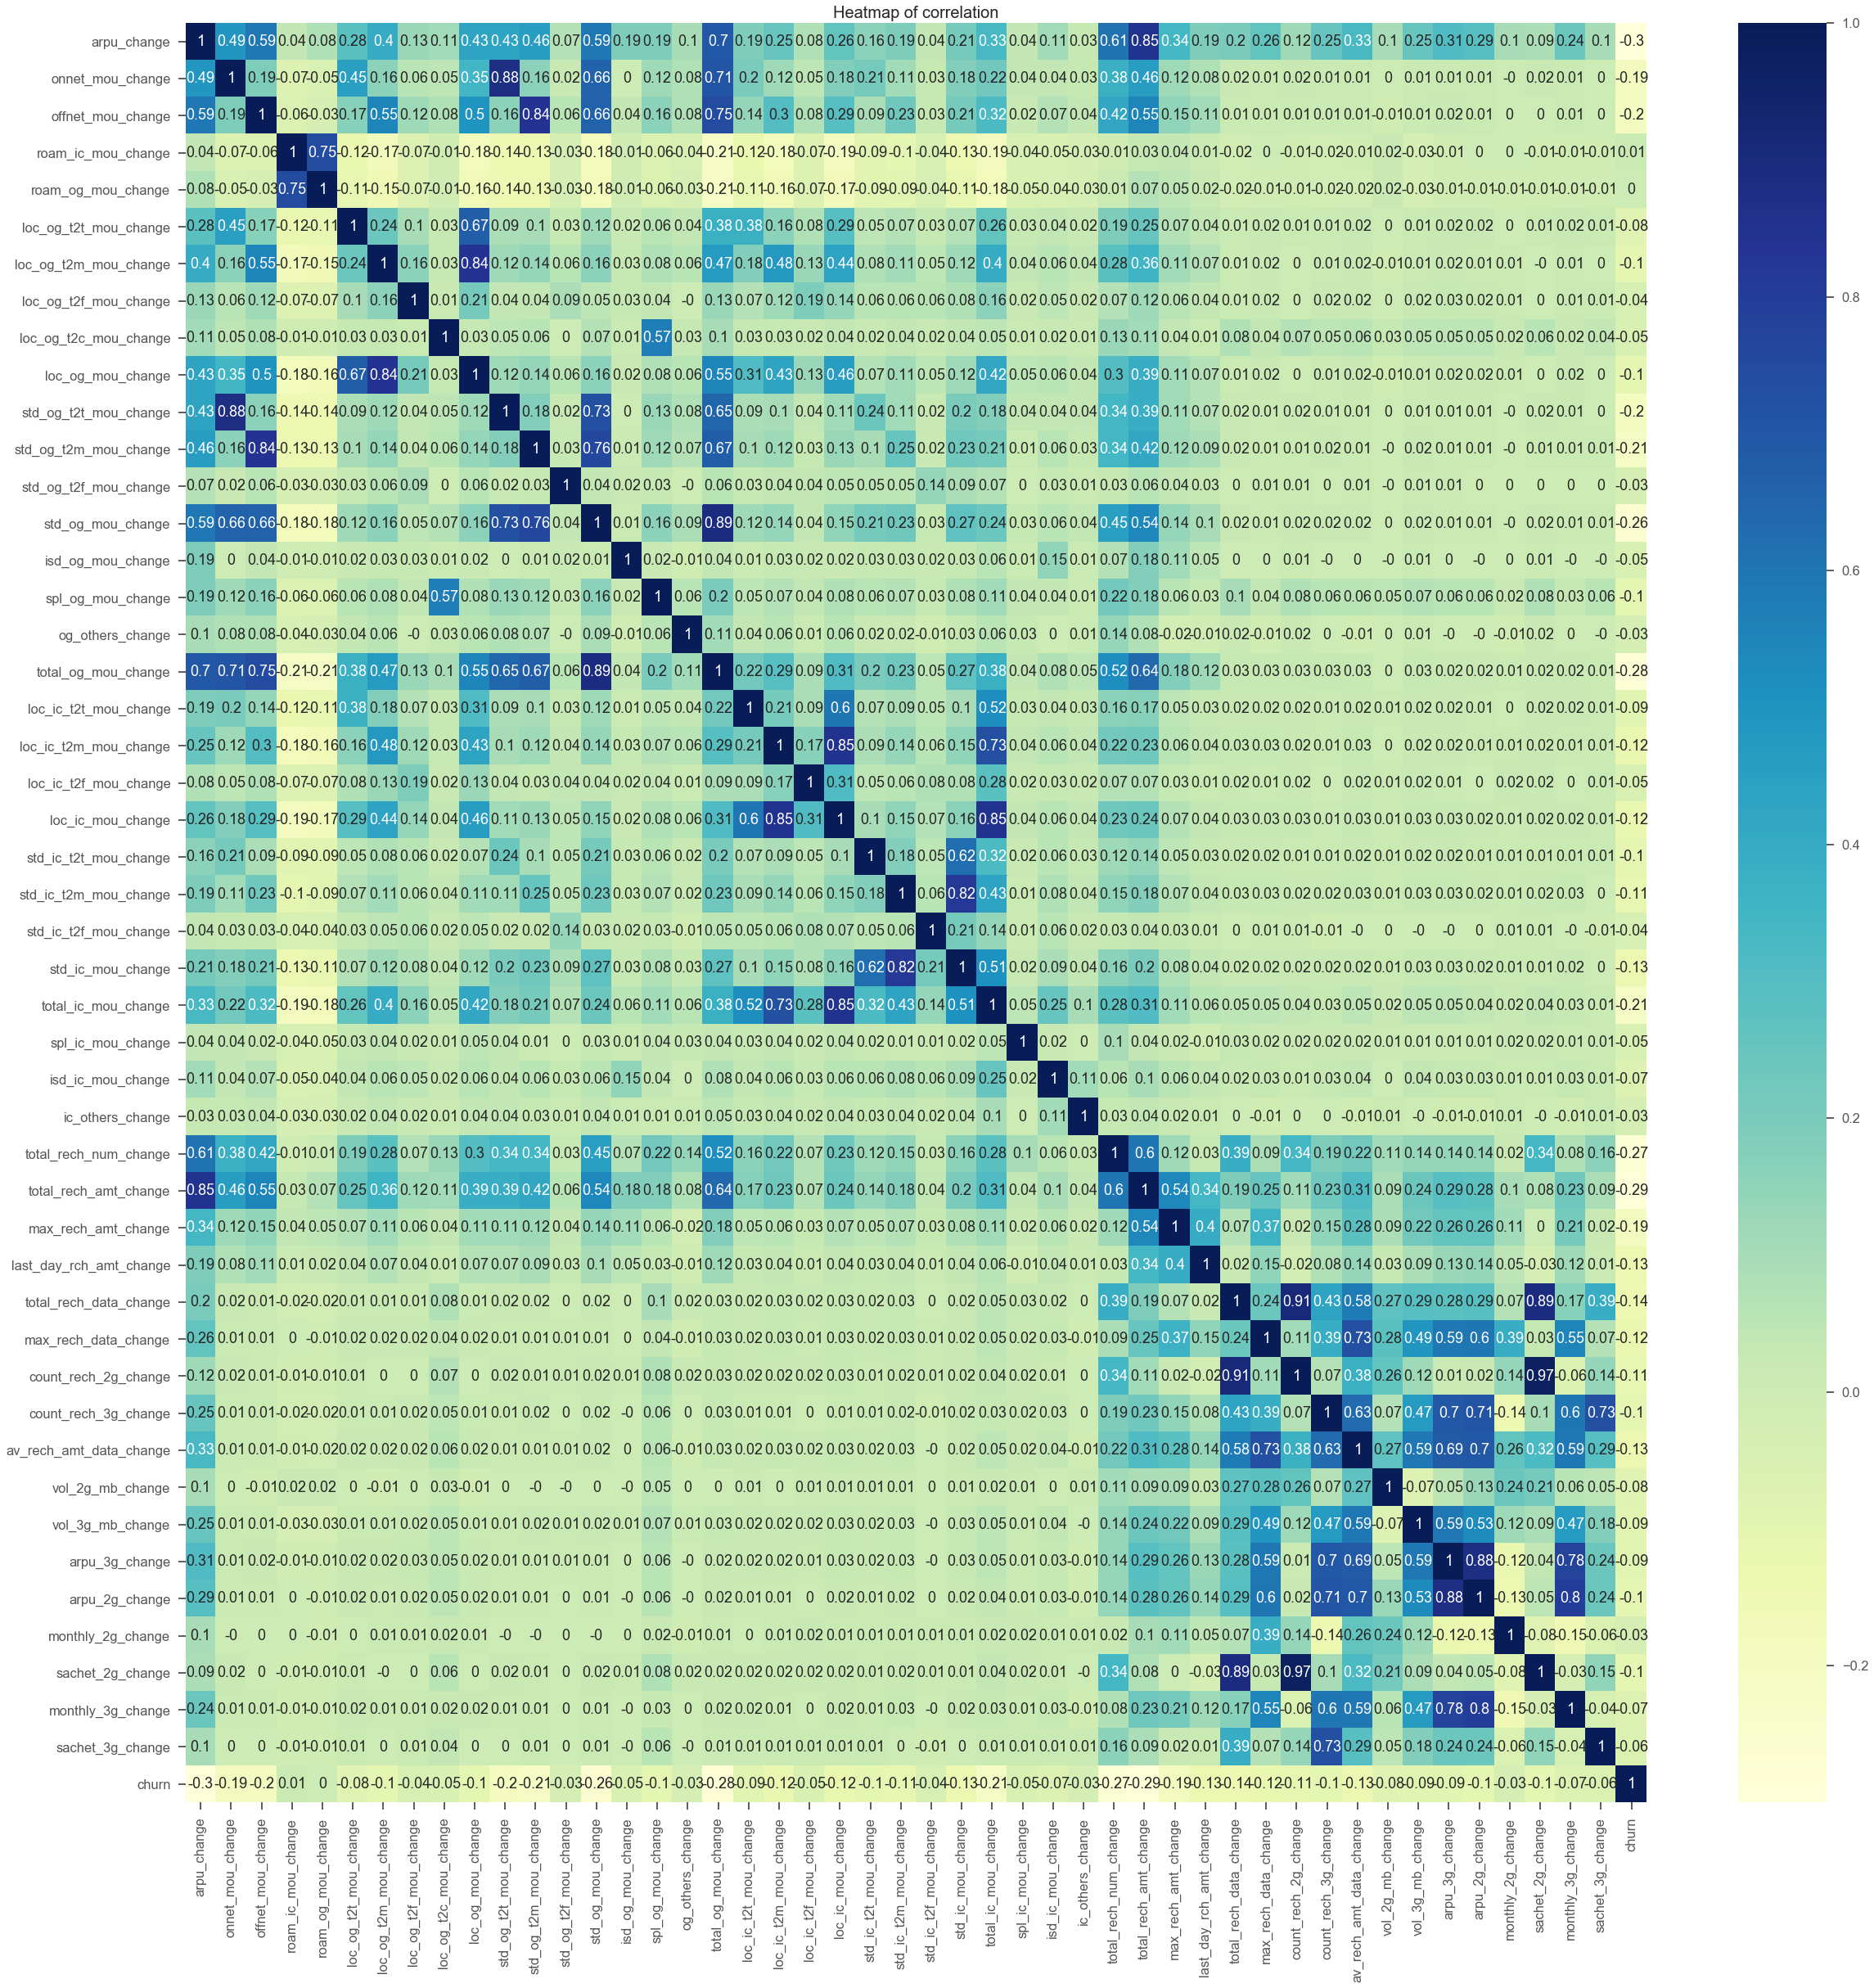

In [53]:
#visualise heatmap of the correlation between columns
plt.figure(figsize=(40, 40))
columns = column_change.copy()
columns.append('churn')
fig = sns.heatmap(telecom_final[columns].corr().apply(lambda x: round(x,2)), cmap="YlGnBu", annot=True)
fig.set_title('Heatmap of correlation',fontsize=20)
plt.show()

There's no correlation between the change column and churn. But some of the change columns are highly correlated.

Lets see churn change for some of the columns

In [54]:
#Defining a function to plot box graphs

def plotBox(column):
    fig = plt.figure(figsize=(24,24))
    plt.subplot(2,2,1)
    fig1 = sns.boxplot(x = 'churn', y = column+'_change', data = telecom_final)
    fig1.set_title(column+'_change vs churn')
    plt.subplot(2,2,2)
    fig2 = sns.boxplot(x = 'churn', y = column+'_6', data = telecom_final)
    fig2.set_title(column+'_6 vs churn')
    plt.subplot(2,2,3)
    fig3 = sns.boxplot(x = 'churn', y = column+'_7', data = telecom_final)
    fig3.set_title(column+'_7 vs churn')
    plt.subplot(2,2,4)
    fig4 = sns.boxplot(x = 'churn', y = column+'_8', data = telecom_final)
    fig4.set_title(column+'_8 vs churn')
    return fig

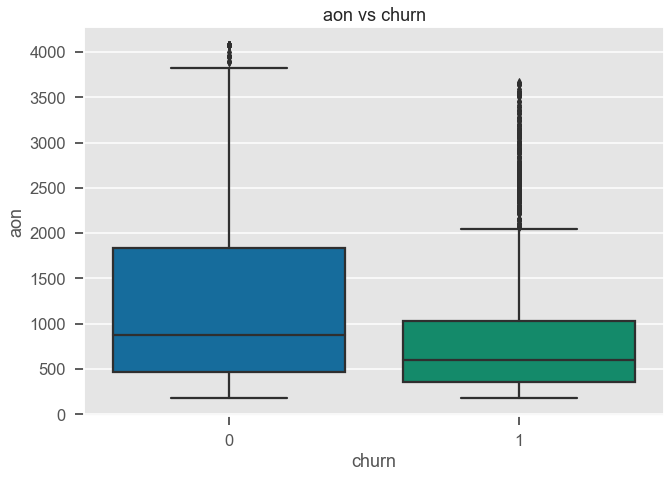

In [55]:
#Plot AON vs CHURN
fig = sns.boxplot(x = 'churn', y = 'aon', data = telecom_final)
fig.set_title('aon vs churn')
plt.show()

Users who don't churn have higher median aon compared to users who churn

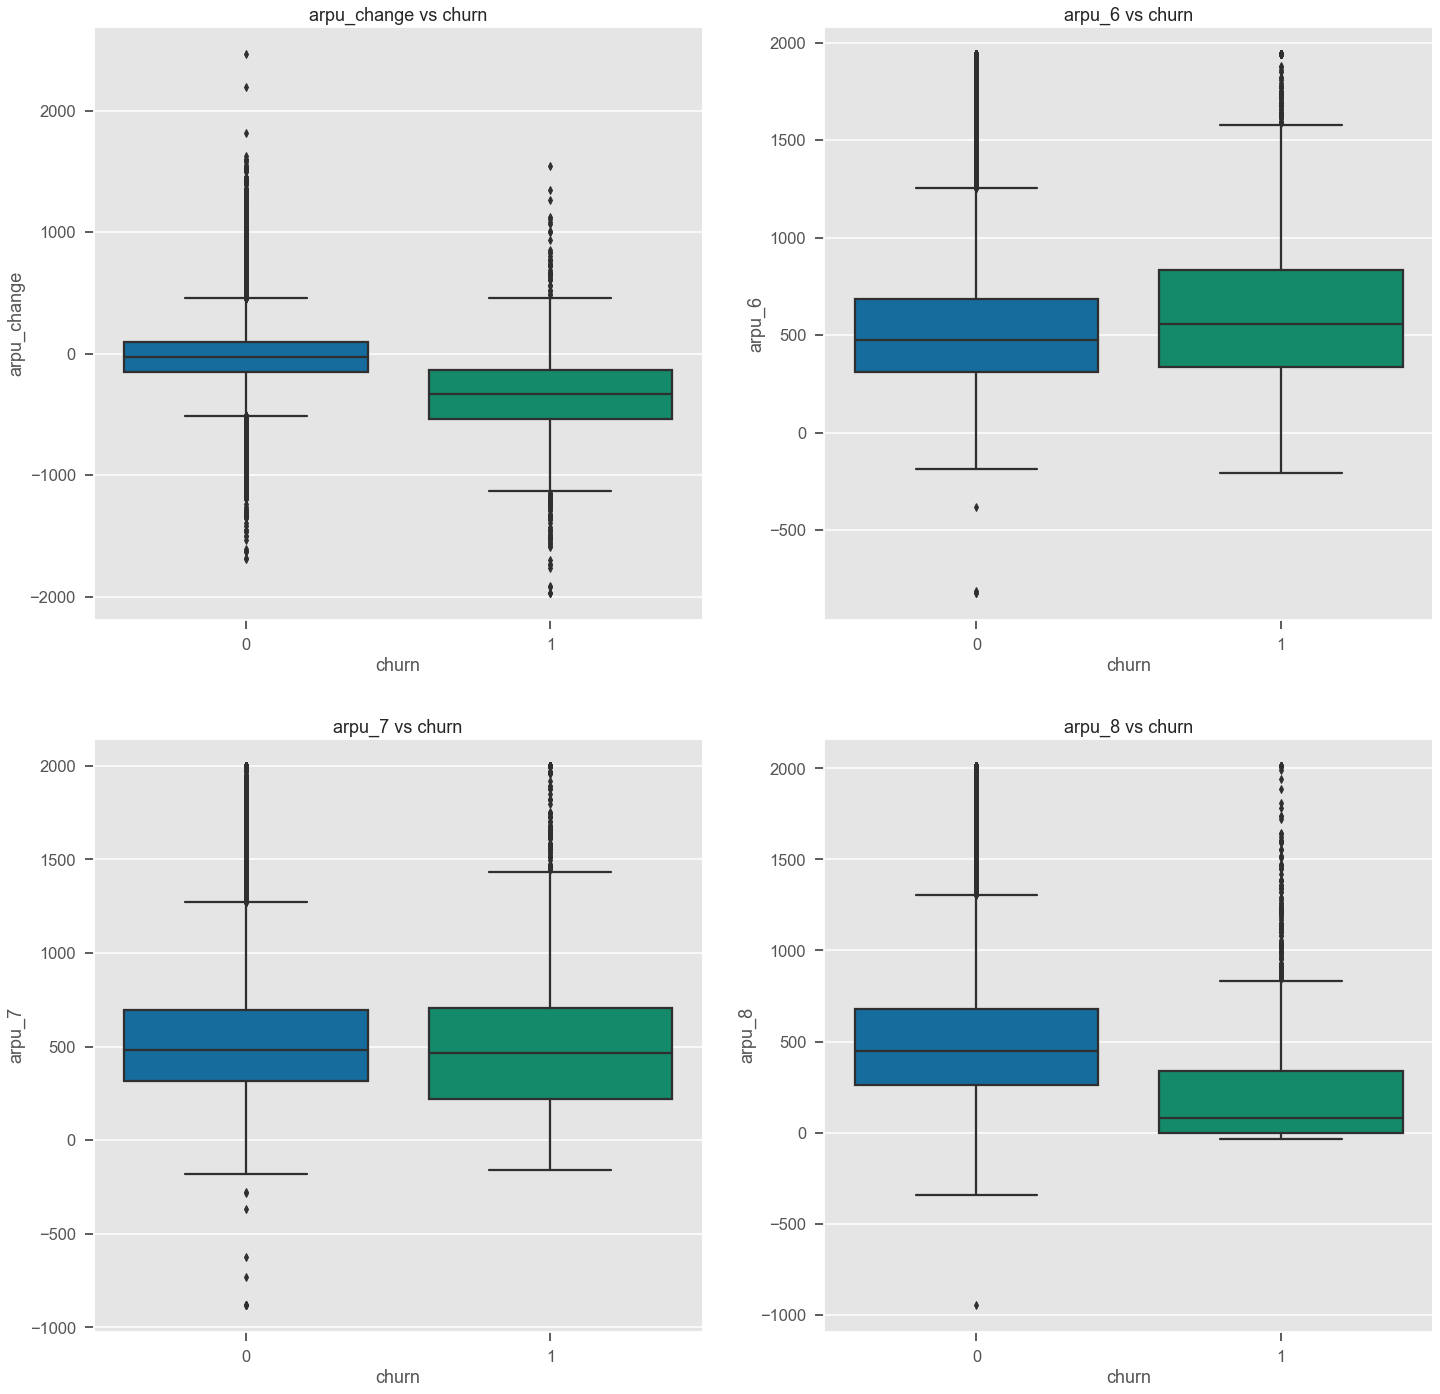

In [56]:
#Plot various ARPU vs Churn
fig = plotBox('arpu')
plt.show()

Users who churn mostly have negative arpu_change,i.e, they have a very low arpu in action phase(month 8) compared to good phase(month 6,7).

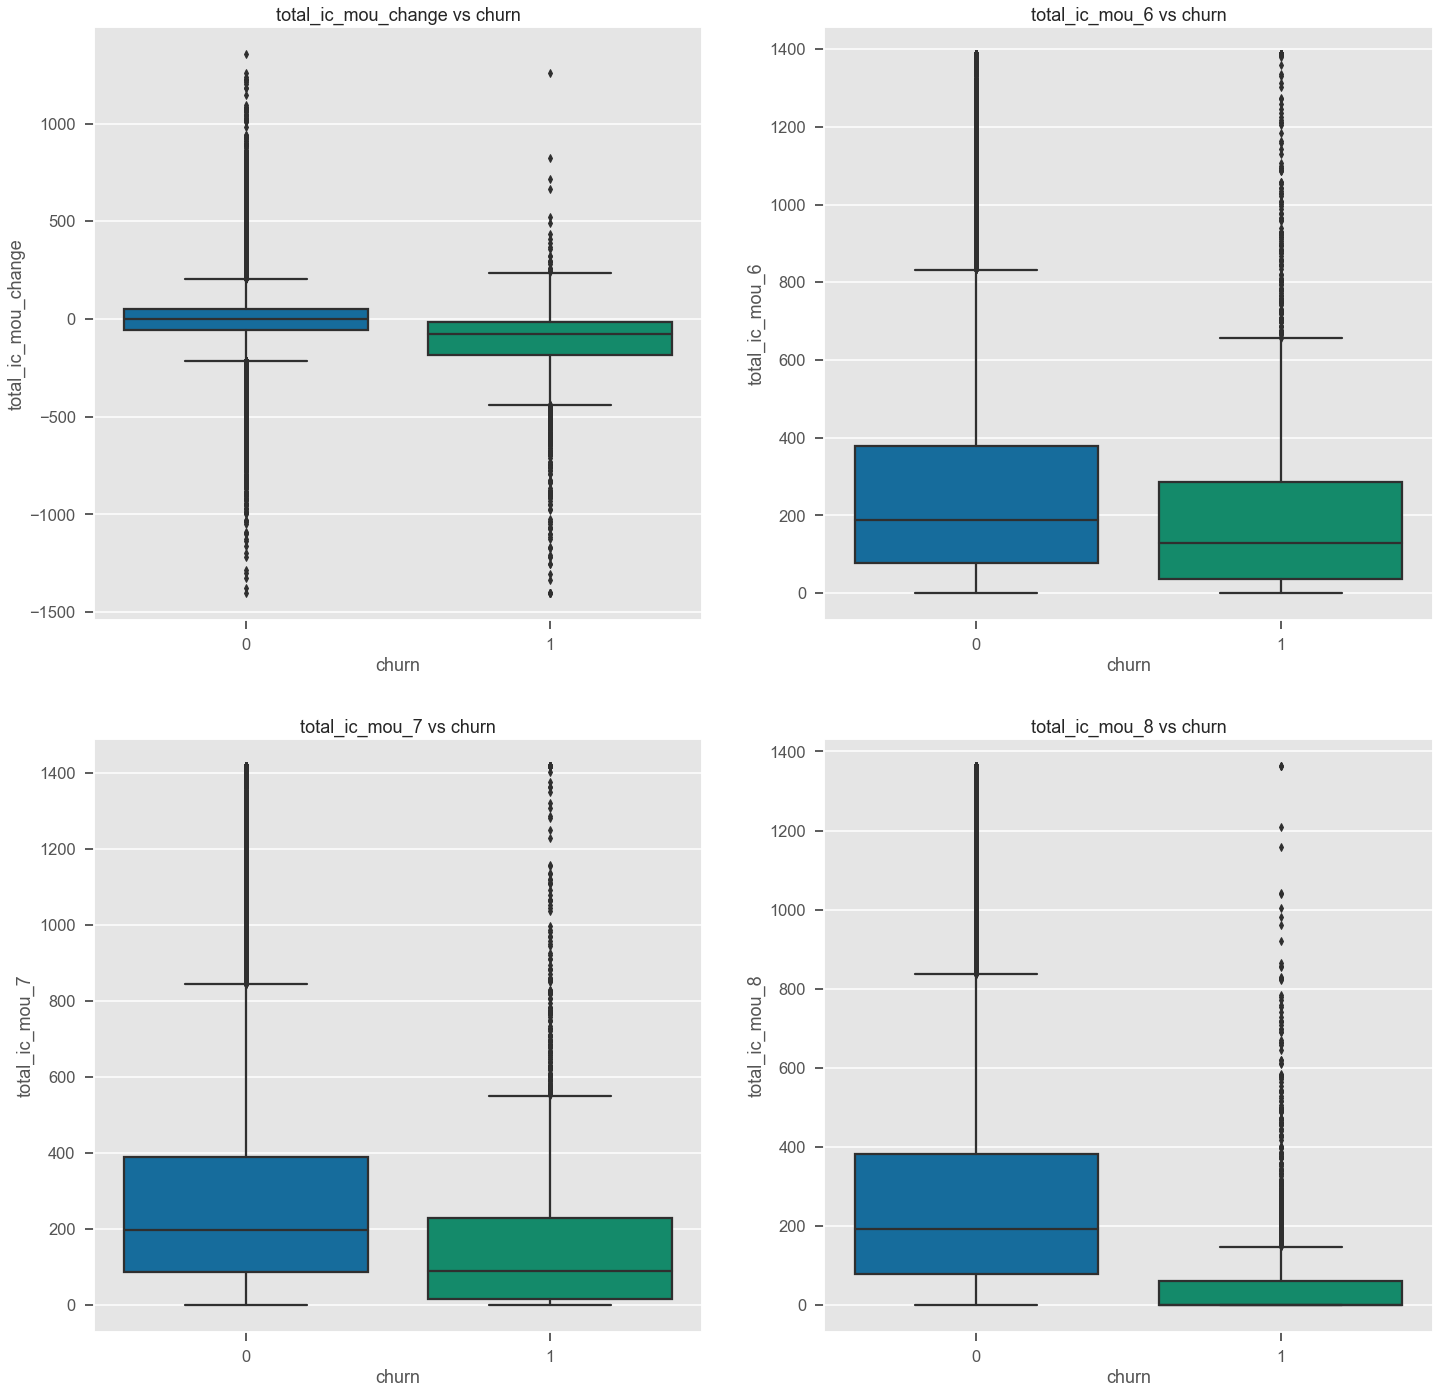

In [57]:
#Plot various total incoming calls vs Churn
fig1 = plotBox('total_ic_mou')
plt.show()

Users who churn have negative total incoming calls, i.e , they have reduced incoming calls from good phase to action phase.

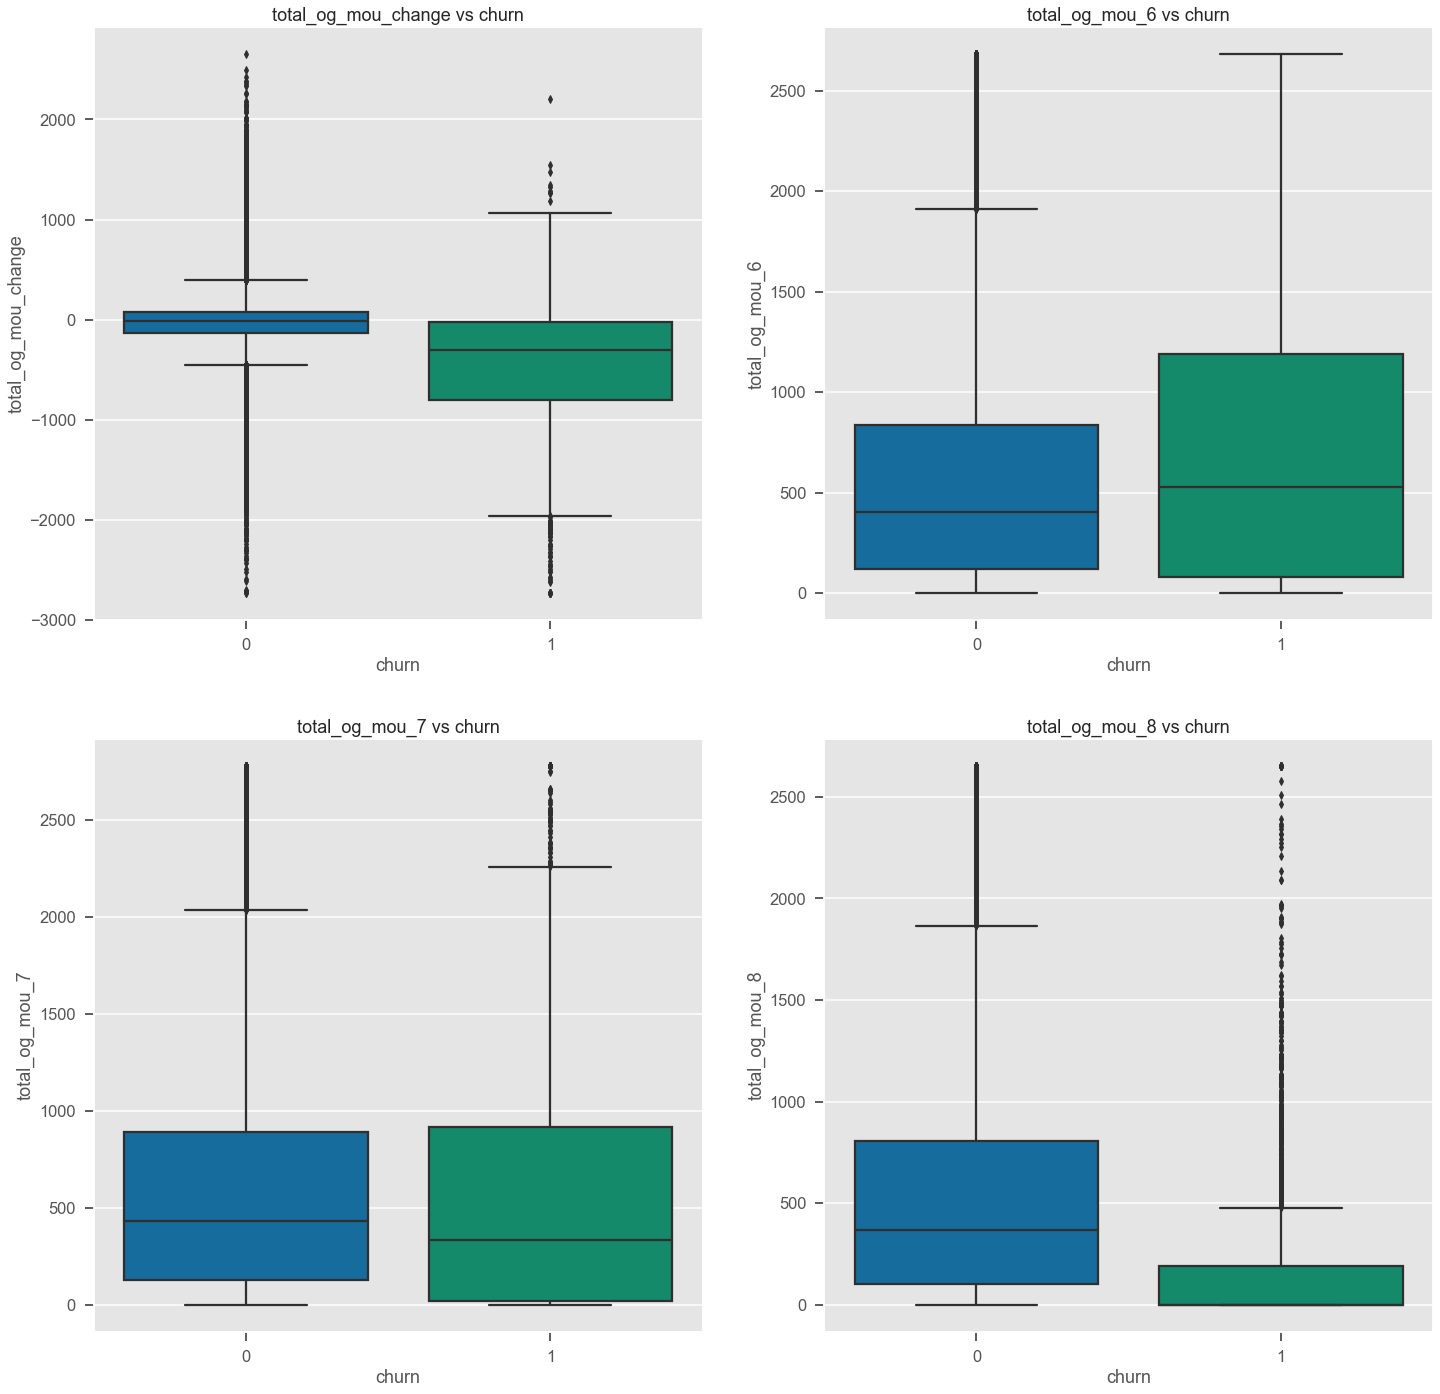

In [58]:
#Plot various total outgoing calls vs Churn
fig = plotBox('total_og_mou')
plt.show()

Similar to incoming calls, Users who churn have negative total outgoing calls, i.e , they have reduced incoming calls from good phase to action phase.

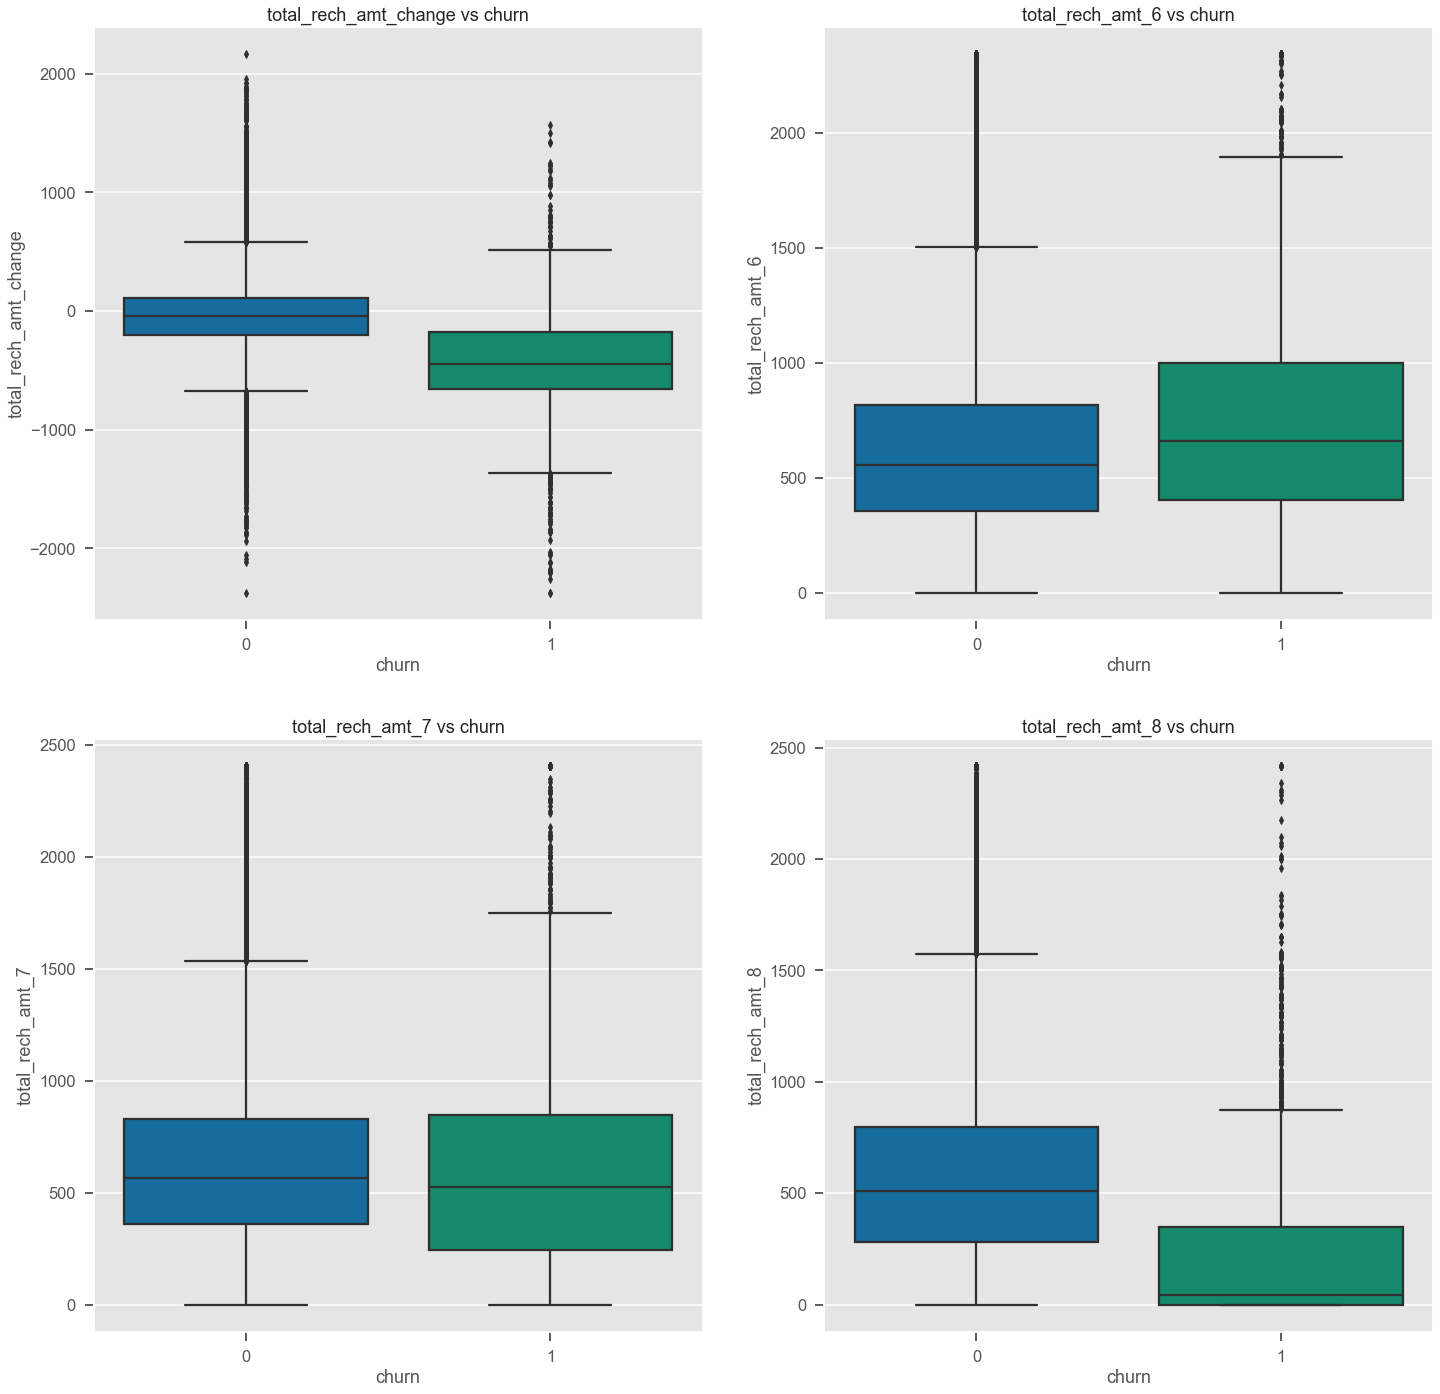

In [59]:
#Plot various total recharge amount vs Churn
fig = plotBox('total_rech_amt')
plt.show()

The trend for total_rech_amt is also same as outgoing/incoming calls

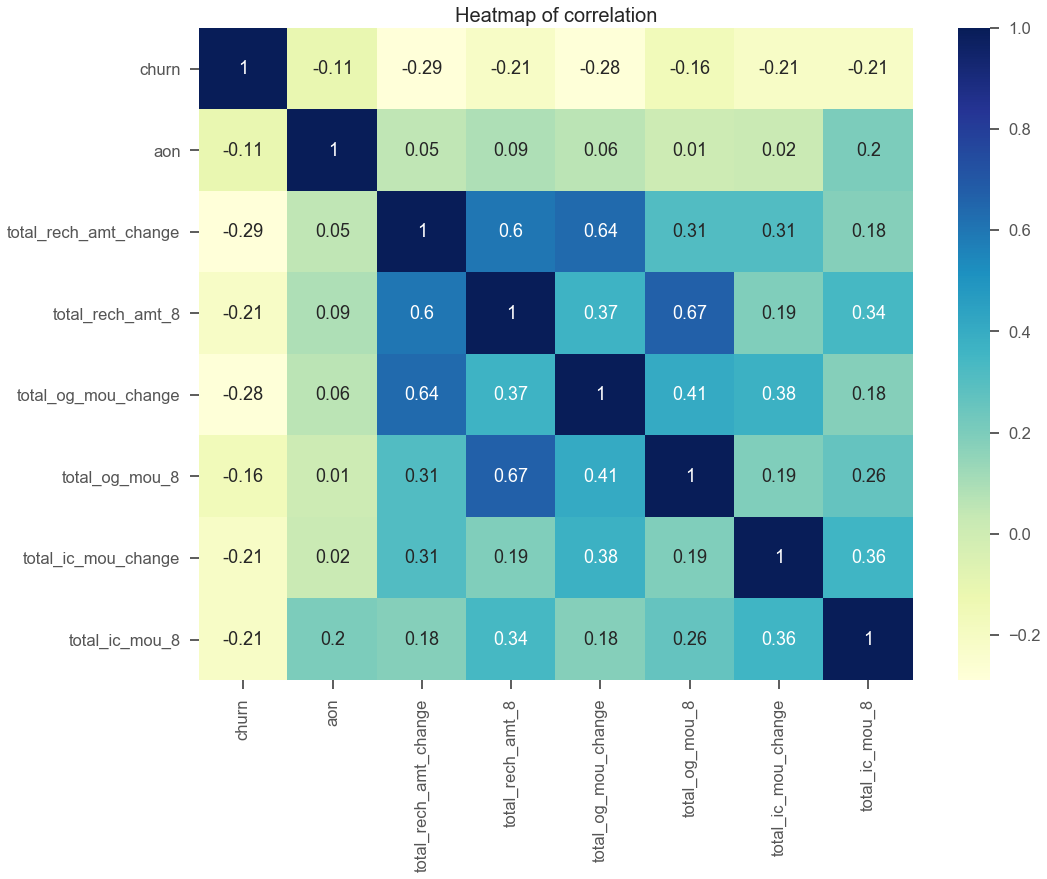

In [60]:
#visualise heatmap of the correlation between columns
plt.figure(figsize=(16, 12))
columns = ['churn','aon','total_rech_amt_change','total_rech_amt_8','total_og_mou_change','total_og_mou_8','total_ic_mou_change','total_ic_mou_8']

fig = sns.heatmap(telecom_final[columns].corr().apply(lambda x: round(x,2)), cmap="YlGnBu", annot=True)
fig.set_title('Heatmap of correlation',fontsize=20)
plt.show()

churn has negative correlation with almost all columns as expected.

Now that we know the way the data behaves. Lets start with modelling.

## Data Modelling

In [61]:
#first step is to perform the data split
telecom_train, telecom_test = train_test_split(telecom_final,train_size=0.7,test_size=0.3,random_state=100,stratify=telecom_final.churn)
#we specify random state to get reproducible output

### Rescaling the features

We can use either Standardisation or Min-Max scaling.

Using Standardisation is better in this context as we can then have all data standardised for PCA. Then compare the coefficients as required.

In [62]:
#Split the data into X, y
y_train = telecom_train.pop('churn')
X_train = telecom_train
y_test = telecom_test.pop('churn')
X_test = telecom_test

In [63]:
#View churn count of training data
y_train.value_counts()

0    19264
1     1703
Name: churn, dtype: int64

In [64]:
#View churn count of testing data
y_test.value_counts()

0    8256
1     730
Name: churn, dtype: int64

We can see that the ratio of churn and not churned is same in train and test data. But it is clear that we have a class imbalance which needs to be taken care of while building model.

In [65]:
#Initialize scaler
scaler = StandardScaler()

#fit and transform train data
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [66]:
#transform test data
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [67]:
#viewing the train data
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
70087 -0.073895 -0.273780 -1.301501    -0.266772    -0.446787    -0.605892   
90560  1.070514  0.006005  0.748787    -0.130438    -0.266754     0.045152   
58800 -0.555159 -0.446165 -0.330781    -0.619467    -0.451473    -0.516720   
24547 -0.029595 -0.596372  0.070455    -0.386988    -0.563160    -0.503739   
50364  3.919462  2.772813  2.211679     0.384171    -0.208503    -0.019977   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
70087      0.859801      0.779112     -0.860442      -0.297809       0.003544   
90560      1.071163      0.199974      1.312827      -0.297809      -0.259846   
58800     -0.712475     -0.651734     -0.665963      -0.297809      -0.259846   
24547     -0.290818     -0.488809     -0.588419      -0.297809      -0.259846   
50364      3.612782      3.441525      3.806423       5.512745       6.426452   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
70087      -0.196016      -0.308451       0.859930      -0.165738   
90560      -0.260908      -0.308451      -0.287803      -0.278350   
58800      -0.260908      -0.308451      -0.287803      -0.278350   
24547      -0.260908      -0.308451      -0.287803      -0.278350   
50364       6.399726       5.285709       5.593970       5.903047   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
70087         -0.512281         -0.479630         -0.546620          0.194080   
90560          0.495006          0.399936          0.948411          1.890887   
58800         -0.437060          0.020628         -0.256534         -0.770119   
24547         -0.435179         -0.508631         -0.511005         -0.434491   
50364          0.039542         -0.130062          0.184281         -0.470062   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
70087         -0.219897         -0.779271          0.090394          0.486397   
90560          0.955319          3.055100          0.198607          0.624083   
58800         -0.728516         -0.744275         -0.205439         -0.342866   
24547         -0.668246         -0.692019         -0.426536         -0.432559   
50364         -0.407654         -0.350742         -0.426536         -0.432559   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
70087         -0.430591         -0.356998         -0.346422         -0.352988   
90560          1.312752         -0.118244          0.404428         -0.352988   
58800         -0.354645         -0.356998         -0.346422         -0.352988   
24547         -0.372565         -0.356998         -0.346422         -0.352988   
50364         -0.430591         -0.356998         -0.346422         -0.352988   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
70087     -0.120325     -0.367103     -0.797786         -0.029117   
90560      1.450839      0.809436      2.457106         -0.292365   
58800     -0.736331     -0.509022     -0.644207         -0.474045   
24547     -0.523377     -0.713687     -0.722270         -0.202394   
50364     -0.336577     -0.370757     -0.194462         -0.133367   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
70087         -0.293555         -0.442587          1.086015          1.026931   
90560         -0.416033         -0.282029          0.080305         -0.314396   
58800         -0.476201         -0.441648         -0.296226         -0.264917   
24547         -0.389962         -0.318753          0.040765         -0.102323   
50364         -0.438754         -0.441077          3.263235          1.921471   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
70087         -0.484907         -0.241324         -0.234668         -0.233642   
90560         -0.213721          7.115128          0.980223         -0.233642   
58800         -0.256464         

In [68]:
#viewing the test data
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
38736  0.855272  1.098179  1.453058    -0.082594     0.158633     0.328163   
14328  1.282364  1.403827  1.156438     0.829993     0.267627     0.775860   
54761 -0.022604  0.458865 -0.968452    -0.597284    -0.567949    -0.614923   
43872 -0.653569 -0.288779 -0.356171    -0.503888    -0.538772    -0.470864   
22105 -0.256716  0.864217  1.026219     0.379481    -0.084752    -0.172700   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
38736      0.394105      0.627067      1.466919      -0.297809      -0.259846   
14328      1.751744      1.425858      2.095179      -0.031642       2.121527   
54761     -0.408594     -0.062372     -0.751097       0.910488       2.714016   
43872     -0.573535     -0.725462     -0.656326      -0.297809      -0.259846   
22105      0.183686      0.230743     -0.226115      -0.297809      -0.259846   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
38736      -0.260908      -0.308451      -0.287803      -0.278350   
14328      -0.260908       0.248702       3.044453      -0.278350   
54761       0.607058       1.272410       1.795882       0.528422   
43872      -0.260908      -0.308451      -0.287803      -0.278350   
22105      -0.260908      -0.308451      -0.287803      -0.278350   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
38736          0.895182          1.488417          2.091746          1.457225   
14328          0.932718         -0.146444          1.082206          3.379667   
54761         -0.510551         -0.463616         -0.546620         -0.503867   
43872         -0.114511         -0.228209         -0.125045         -0.187109   
22105          2.334313          1.049409          0.677961          1.096571   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
38736          2.079409          3.197837          1.232467          0.549339   
14328          1.782144          3.729486         -0.247479         -0.306675   
54761         -0.280168         -0.779271         -0.151722         -0.087950   
43872         -0.452601         -0.444347         -0.426536         -0.432559   
22105          0.915122          0.172982          4.038991          5.255728   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
38736          1.121608         -0.356998         -0.346422          0.814424   
14328         -0.348672         -0.356998         -0.346422         -0.352988   
54761         -0.430591         -0.356998         -0.346422         -0.352988   
43872         -0.430591          2.250296         -0.346422          1.004468   
22105          3.997314         -0.356998          0.009584          1.406768   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
38736      1.386006      2.038366      3.045284         -0.404355   
14328      2.608622      1.064246      3.051217          0.626935   
54761     -0.590775     -0.423884     -0.797786         -0.473160   
43872     -0.217973     -0.444833     -0.391976         -0.474045   
22105      1.905330      1.393064      0.548552         -0.467158   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
38736         -0.365280         -0.428187         -0.340300         -0.370425   
14328          0.339954          0.530663          0.150950          0.395030   
54761         -0.454988         -0.442587         -0.371532         -0.102957   
43872         -0.476201         -0.442587         -0.506861         -0.516174   
22105         -0.469472         -0.426978         -0.496873         -0.465126   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
38736         -0.102314         -0.241324         -0.234668         -0.079774   
14328          0.292845         -0.241324         -0.234668         -0.036432   
54761         -0.484907         

### Create a base model

In [69]:
#Function to evaluate the models we build
def model_eval(model,X_train,X_test,y_train,y_test):
    y_train_pred = model.predict(X_train)
    print('---------------------------------------------------------------------------------------------')
    print('--------------------------------------------TRAIN--------------------------------------------')
    print('---------------------------------------------------------------------------------------------')
    #Accuracy
    print('Accuracy: '+str(round(metrics.accuracy_score(y_train, y_train_pred),2)))
    #Recall
    print('Recall/Sensitivity: '+str(round(metrics.recall_score(y_train, y_train_pred),2)))
    print('Confusion Matrix: ')
    print(metrics.confusion_matrix(y_train,y_train_pred))
    #ROC_AUC_PLOT
    plot_roc_curve(model, X_train, y_train, drop_intermediate=False)
    plt.show()
    
    
    print('\n\n')
    
    print('---------------------------------------------------------------------------------------------')
    print('--------------------------------------------TEST--------------------------------------------')
    print('---------------------------------------------------------------------------------------------')
    y_test_pred = model.predict(X_test)
    #Accuracy
    print('Accuracy: '+str(round(metrics.accuracy_score(y_test, y_test_pred),2)))
    #Recall
    print('Recall/Sensitivity: '+str(round(metrics.recall_score(y_test, y_test_pred),2)))
    print('Confusion Matrix: ')
    print(metrics.confusion_matrix(y_test,y_test_pred))
    #ROC_AUC_PLOT
    plot_roc_curve(model, X_test, y_test, drop_intermediate=False)
    plt.show()
    
    

In [70]:
#Instantiate PCA and base model
pca = PCA(n_components=0.9,random_state=100)

In [71]:
#Fit model with train data
pca.fit(X_train)

PCA(n_components=0.9, random_state=100)

In [72]:
#Calculate the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

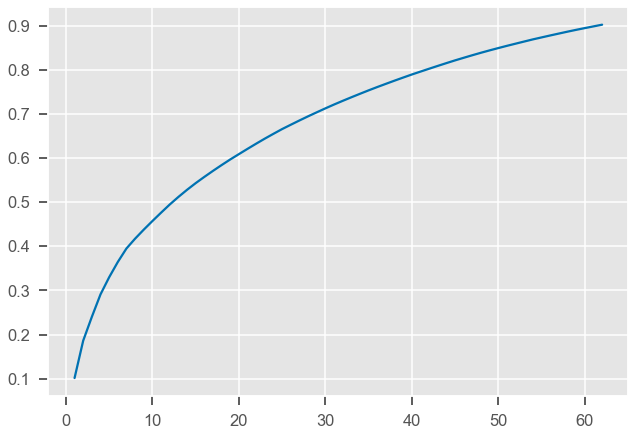

In [73]:
#Plot the scree plot
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [74]:
#Get the transformed train data after applying PCA
df_train_pca = pca.fit_transform(X_train)
df_train_pca.shape

(20967, 62)

In [75]:
#Get the transformed test data after applying PCA
df_test_pca = pca.transform(X_test)
df_test_pca.shape

(8986, 62)

In [76]:
#Instantiate LogisticRegression Model
logisticRegression = LogisticRegression(class_weight='balanced')

In [77]:
#Fit LR Model
logisticModel = logisticRegression.fit(df_train_pca,y_train)

In [78]:
#Prediction Probability on test data
pred_probs_test = logisticModel.predict_proba(df_test_pca)[:,1]

In [79]:
#ROC_AUC score of our base model
round(metrics.roc_auc_score(y_test, pred_probs_test),2)

0.89

---------------------------------------------------------------------------------------------
--------------------------------------------TRAIN--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.81
Recall/Sensitivity: 0.82
Confusion Matrix: 
[[15551  3713]
 [  300  1403]]


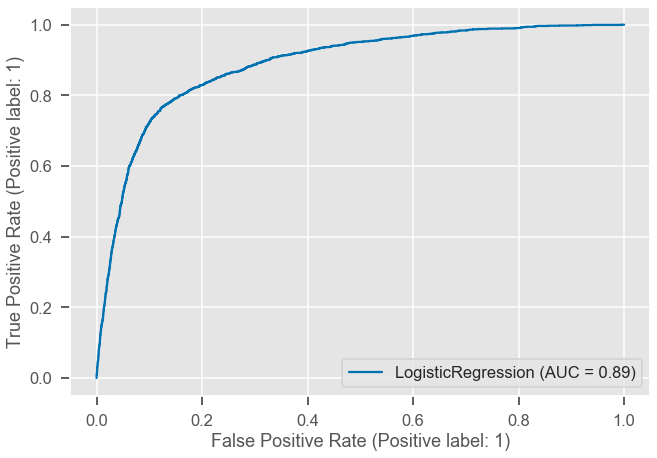




---------------------------------------------------------------------------------------------
--------------------------------------------TEST--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.81
Recall/Sensitivity: 0.85
Confusion Matrix: 
[[6629 1627]
 [ 106  624]]


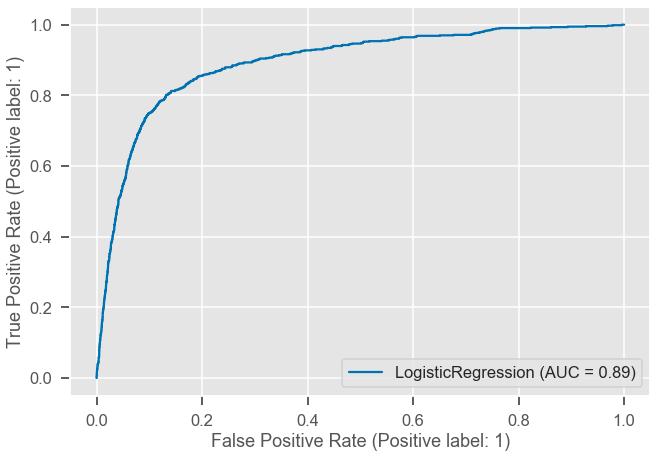

In [80]:
#View Model evaluation metrics
model_eval(logisticModel,df_train_pca,df_test_pca,y_train,y_test)

Our Base Model is giving a good ROC_AUC score of 0.89 and good accuracy of 0.81 and good sensitivity of 0.85.

Next Step is to improve the score using Hyper-Parameter Tuning.

### Hyper Parameter Tuning

We will build two models
1. PCA + Logistic Regression
2. Random Forest Classifier

We will also be tuning some of the parameters for these models to get a model better than our base model.
We will be using GridSearCV with stratified K fold for balanced class weights.

We will select the best model between the two after considering various evaluation metrics like Accuracy,Sensitivity, ROC_AUC score.

But before we proceed with parameter tuning we need to balance over data . We can do this using SMOTE(oversampling)

In [81]:
#Instantiate Smote
sm = SMOTE(random_state=100)
X_train,y_train = sm.fit_resample(X_train,y_train)
X_test,y_test = sm.fit_resample(X_test,y_test)

In [82]:
#Check churn values
y_train.value_counts()

1    19264
0    19264
Name: churn, dtype: int64

In [83]:
#Check churn values
y_test.value_counts()

1    8256
0    8256
Name: churn, dtype: int64

#### PCA + LogisticRegression

In [84]:
#Instantiate PCA
pca = PCA(random_state=100)

#Instantiate Logistic Regression
logisticRegression = LogisticRegression(random_state=100)

#Parameters to be tuned
params = {
    'pca__n_components': [70,75,80,85,90],
    'logisticRegression__C': [0,0.1,0.2,0.5,1,2,5,10]
}

In [85]:
#Pipeline steps
steps = [('pca',pca),('logisticRegression',logisticRegression)]

#Instantiate Pipeline
pipeline = Pipeline(steps)

In [86]:
#Instantiate Cross Validator
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=100)

#Instantiate GridSearch
grid_search = GridSearchCV(estimator=pipeline,param_grid=params,cv=cv,n_jobs=-1, verbose=1, scoring="roc_auc")

In [87]:
%%time
#Fit the Model using grid search

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Wall time: 2min 1s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=100)),
                                       ('logisticRegression',
                                        LogisticRegression(random_state=100))]),
             n_jobs=-1,
             param_grid={'logisticRegression__C': [0, 0.1, 0.2, 0.5, 1, 2, 5,
                                                   10],
                         'pca__n_components': [70, 75, 80, 85, 90]},
             scoring='roc_auc', verbose=1)

In [88]:
#Best Score
grid_search.best_score_

0.911614479226931

In [89]:
#Best Estimator
pipeline_best = grid_search.best_estimator_
pipeline_best

Pipeline(steps=[('pca', PCA(n_components=90, random_state=100)),
                ('logisticRegression',
                 LogisticRegression(C=5, random_state=100))])

In [90]:
#Best Params
grid_search.best_params_

{'logisticRegression__C': 5, 'pca__n_components': 90}

---------------------------------------------------------------------------------------------
--------------------------------------------TRAIN--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.84
Recall/Sensitivity: 0.85
Confusion Matrix: 
[[15885  3379]
 [ 2817 16447]]


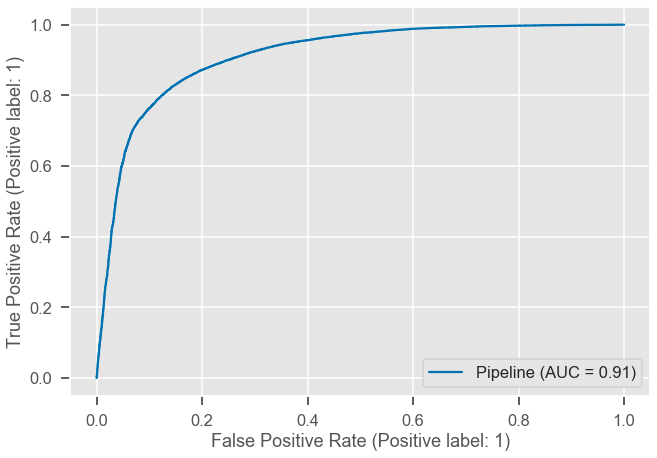




---------------------------------------------------------------------------------------------
--------------------------------------------TEST--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.85
Recall/Sensitivity: 0.88
Confusion Matrix: 
[[6784 1472]
 [ 987 7269]]


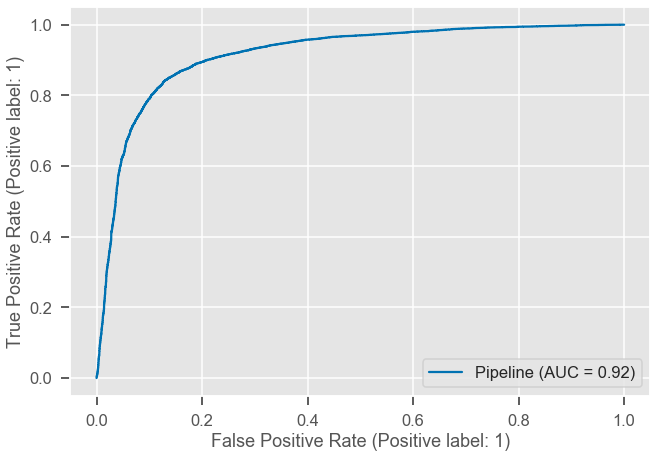

In [91]:
#View Model evaluation metrics
model_eval(pipeline_best,X_train,X_test,y_train,y_test)

#### Random Forest Classifier

In [92]:
#Instantiate Classifier

rf = RandomForestClassifier(random_state=100, n_jobs=-1)

#Parameters to be tuned
params = {
    'max_depth': [10,20,50],
    'min_samples_leaf': [50,100,200],
}

In [93]:
#Instantiate Cross Validator
cv = StratifiedKFold(n_splits = 5,shuffle=True, random_state=100)

#Instantiate GridSearch
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv=cv,n_jobs=-1, verbose=1, scoring="roc_auc")

In [94]:
%%time
#Fit the Model using grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Wall time: 3min 24s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [95]:
#Best Estimator
rf_best = grid_search.best_estimator_

In [96]:
#Best Params
grid_search.best_params_

{'max_depth': 50, 'min_samples_leaf': 50}

---------------------------------------------------------------------------------------------
--------------------------------------------TRAIN--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.93
Recall/Sensitivity: 0.93
Confusion Matrix: 
[[17905  1359]
 [ 1298 17966]]


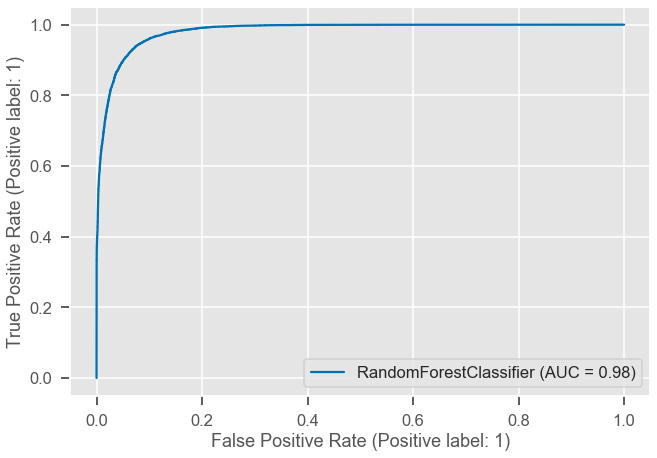




---------------------------------------------------------------------------------------------
--------------------------------------------TEST--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.9
Recall/Sensitivity: 0.87
Confusion Matrix: 
[[7594  662]
 [1039 7217]]


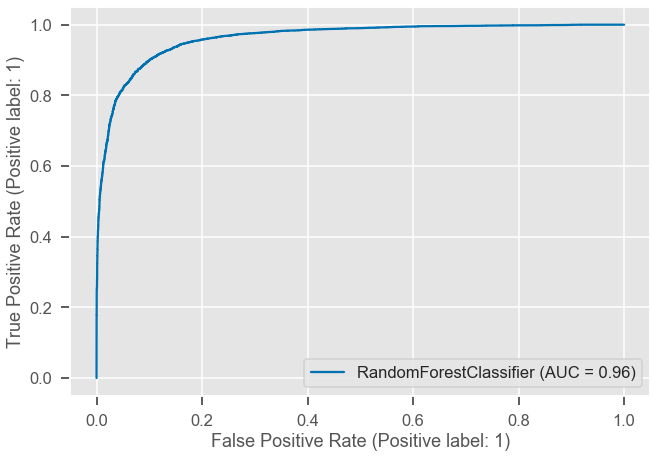

In [97]:
#View Model evaluation metrics
model_eval(rf_best,X_train,X_test,y_train,y_test)

In [98]:
#Create a Significance Dataframe
feature_importance = pd.DataFrame({
    "FeatureName": X_train.columns,
    "Significance": rf_best.feature_importances_
})

In [99]:
#View the Significance of various features
feature_importance.Significance = feature_importance.Significance.apply(lambda x: round(x*100,2))

feature_importance.sort_values(by="Significance", ascending=False).head(40)

FeatureName  Significance
80            total_ic_mou_8          8.50
2                     arpu_8          4.99
14             roam_og_mou_8          4.70
101       last_day_rch_amt_8          4.52
95          total_rech_amt_8          4.51
11             roam_ic_mou_8          4.45
53            total_og_mou_8          3.21
157            fb_user_8_yes          2.69
65              loc_ic_mou_8          2.54
150      night_pck_user_8_no          2.51
98            max_rech_amt_8          2.41
104        total_rech_data_8          2.37
158              arpu_change          2.23
191  last_day_rch_amt_change          2.22
59          loc_ic_t2m_mou_8          2.08
29              loc_og_mou_8          2.01
116       av_rech_amt_data_8          1.97
161       roam_ic_mou_change          1.80
107          max_rech_data_8          1.62
175      total_og_mou_change          1.60
162       roam_og_mou_change          1.56
20          loc_og_t2m_mou_8          1.53
184      total_ic_mou_change          1.46
190      max_rech_amt_change          1.27
188    total_rech_num_change          1.23
92          total_rech_num_8          1.17
189    total_rech_amt_change          1.08
17          loc_og_t2t_mou_8          1.04
56          loc_ic_t2t_mou_8          0.90
110          count_rech_2g_8          0.90
13             roam_og_mou_7          0.82
23          loc_og_t2f_mou_8          0.74
168    std_og_t2t_mou_change          0.69
32          std_og_t2t_mou_8          0.68
41              std_og_mou_8          0.56
122              vol_3g_mb_8          0.52
8               offnet_mou_8          0.50
179        loc_ic_mou_change          0.49
180    std_ic_t2t_mou_change          0.44
77              std_ic_mou_8          0.44

total incoming calls and total recharge amount in the action phase (month 8) seem to be really significant.

### Build a Logistic Regression Model considering only Significant Columns

In [100]:
#Selecting few significant columns from above list
significant_columns = ['total_ic_mou_8','last_day_rch_amt_8','total_og_mou_8','total_rech_amt_8',
                       'arpu_change','roam_og_mou_8','night_pck_user_8_no','total_og_mou_change',
                       'last_day_rch_amt_change','total_rech_data_8','av_rech_amt_data_8']

In [101]:
#Building a logistic regression model with only the selected significant columns
logisticRegression = LogisticRegression(random_state=100)

logisticModel = logisticRegression.fit(X_train[significant_columns],y_train)

In [102]:
#Predict train and test churn outcome using the model
y_train_pred = logisticModel.predict(X_train[significant_columns])
y_test_pred = logisticModel.predict(X_test[significant_columns])

---------------------------------------------------------------------------------------------
--------------------------------------------TRAIN--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.82
Recall/Sensitivity: 0.83
Confusion Matrix: 
[[15678  3586]
 [ 3248 16016]]


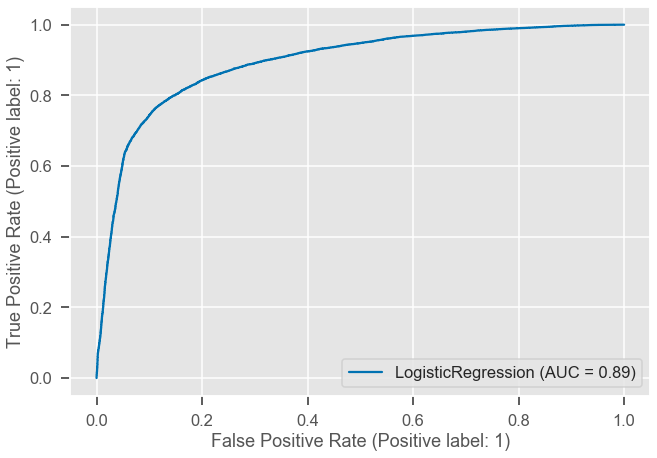




---------------------------------------------------------------------------------------------
--------------------------------------------TEST--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.83
Recall/Sensitivity: 0.85
Confusion Matrix: 
[[6675 1581]
 [1251 7005]]


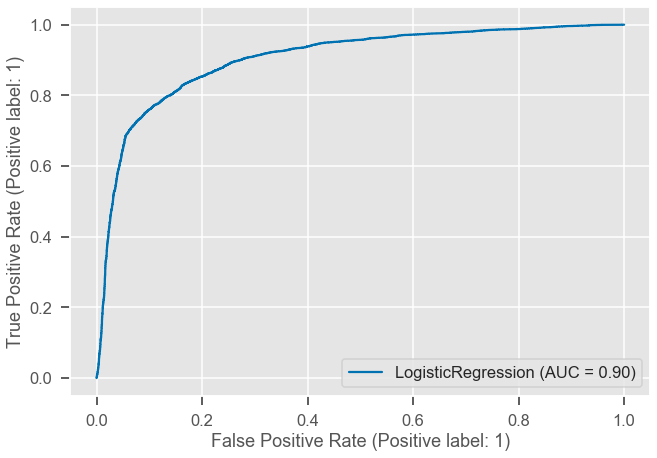

In [103]:
#View Model evaluation metrics
model_eval(logisticModel,X_train[significant_columns],X_test[significant_columns],y_train,y_test)

In [104]:
#Viewing coefficients of various features
logisticModel.coef_

array([[-1.66489734, -0.45047638, -0.46784737,  0.15919997, -0.40616494,
         0.21159321, -0.44310073, -0.14429389, -0.06184967, -0.47149003,
        -0.14071486]])

In [105]:
#Create a coefficients Dataframe
feature_coefficients = pd.DataFrame({
    "FeatureName": significant_columns,
    "coefficients": logisticModel.coef_[0],
    "Significance": abs(logisticModel.coef_[0])
})

In [106]:
#View the significant coefficients of features
feature_coefficients.sort_values(by="Significance", ascending=False)[['FeatureName','coefficients']]

FeatureName  coefficients
0            total_ic_mou_8     -1.664897
9         total_rech_data_8     -0.471490
2            total_og_mou_8     -0.467847
1        last_day_rch_amt_8     -0.450476
6       night_pck_user_8_no     -0.443101
4               arpu_change     -0.406165
5             roam_og_mou_8      0.211593
3          total_rech_amt_8      0.159200
7       total_og_mou_change     -0.144294
10       av_rech_amt_data_8     -0.140715
8   last_day_rch_amt_change     -0.061850

In [107]:
#Function to view VIF
def get_vif(df_train):
    vif = pd.DataFrame()
    X = df_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [108]:
#View VIF of 
get_vif(X_train[significant_columns])

Features   VIF
3          total_rech_amt_8  4.70
4               arpu_change  3.69
10       av_rech_amt_data_8  2.88
2            total_og_mou_8  2.87
7       total_og_mou_change  2.77
1        last_day_rch_amt_8  2.75
6       night_pck_user_8_no  2.66
9         total_rech_data_8  2.04
8   last_day_rch_amt_change  1.97
0            total_ic_mou_8  1.56
5             roam_og_mou_8  1.32

## Evaluating the Models

### PCA+LogisticRegression

In [109]:
#model
pipeline_best

Pipeline(steps=[('pca', PCA(n_components=90, random_state=100)),
                ('logisticRegression',
                 LogisticRegression(C=5, random_state=100))])

---------------------------------------------------------------------------------------------
--------------------------------------------TRAIN--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.84
Recall/Sensitivity: 0.85
Confusion Matrix: 
[[15885  3379]
 [ 2817 16447]]


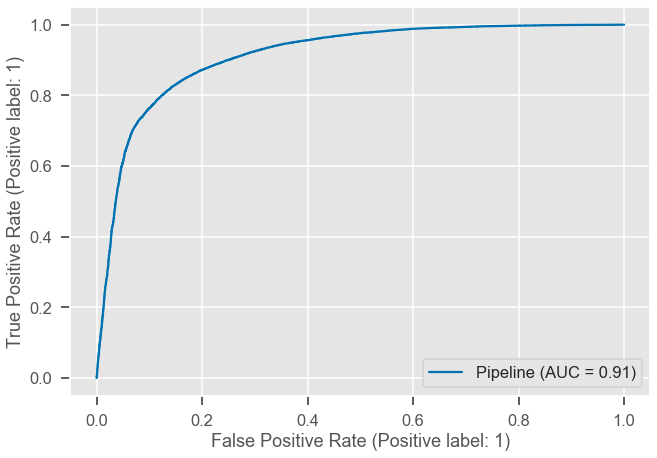




---------------------------------------------------------------------------------------------
--------------------------------------------TEST--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.85
Recall/Sensitivity: 0.88
Confusion Matrix: 
[[6784 1472]
 [ 987 7269]]


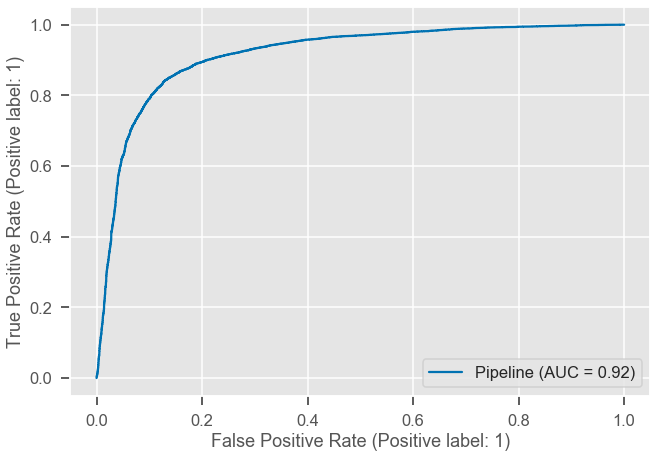

In [110]:
#View Model evaluation metrics
model_eval(pipeline_best,X_train,X_test,y_train,y_test)

### RandomForestClassifier

In [111]:
#model
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=50, n_jobs=-1,
                       random_state=100)

---------------------------------------------------------------------------------------------
--------------------------------------------TRAIN--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.93
Recall/Sensitivity: 0.93
Confusion Matrix: 
[[17905  1359]
 [ 1298 17966]]


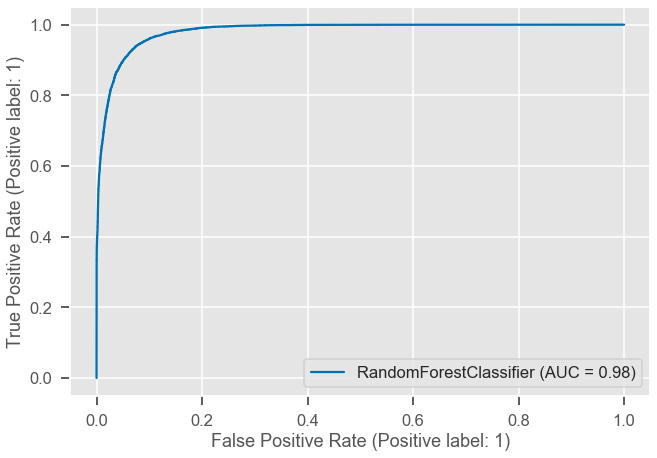




---------------------------------------------------------------------------------------------
--------------------------------------------TEST--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.9
Recall/Sensitivity: 0.87
Confusion Matrix: 
[[7594  662]
 [1039 7217]]


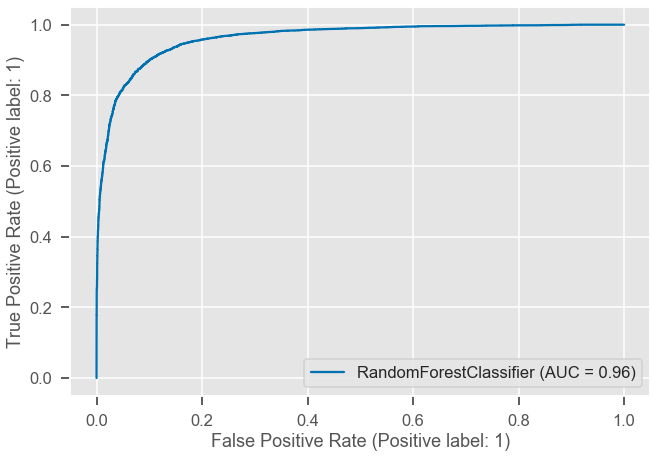

In [112]:
#View Model evaluation metrics
model_eval(rf_best,X_train,X_test,y_train,y_test)

### LogisticRegression with significant columns

In [113]:
#model
logisticModel

LogisticRegression(random_state=100)

---------------------------------------------------------------------------------------------
--------------------------------------------TRAIN--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.82
Recall/Sensitivity: 0.83
Confusion Matrix: 
[[15678  3586]
 [ 3248 16016]]


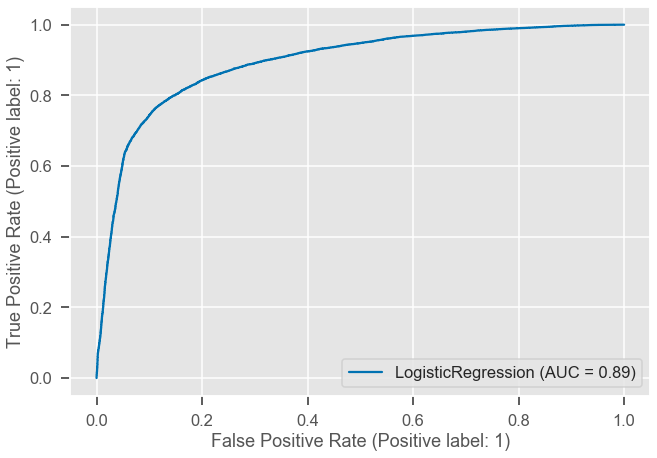




---------------------------------------------------------------------------------------------
--------------------------------------------TEST--------------------------------------------
---------------------------------------------------------------------------------------------
Accuracy: 0.83
Recall/Sensitivity: 0.85
Confusion Matrix: 
[[6675 1581]
 [1251 7005]]


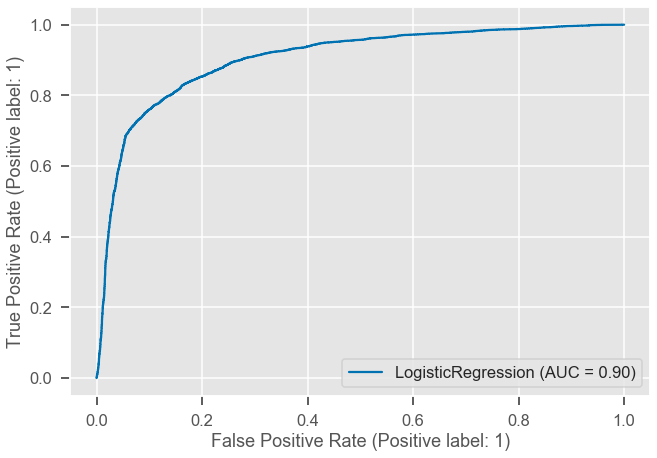

In [114]:
#View Model evaluation metrics
model_eval(logisticModel,X_train[significant_columns],X_test[significant_columns],y_train,y_test)

In [115]:
#Concat the oversampled data
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])
X['churn'] = y 

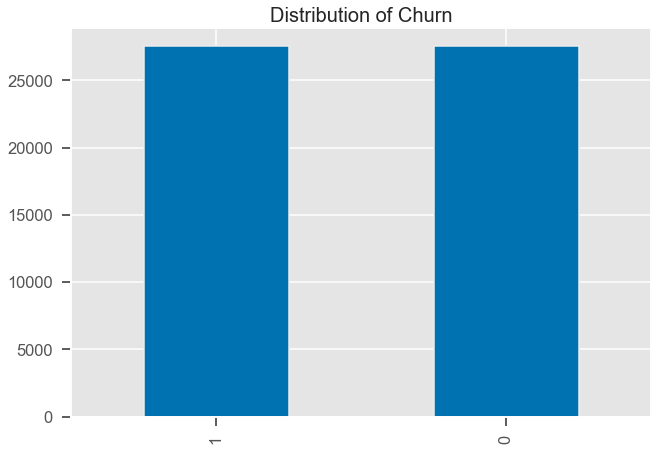

In [116]:
#Visualizing the target variable - Churn
fig = X.churn.value_counts().plot.bar()
fig.set_title('Distribution of Churn',fontsize=20)
plt.show()

We can see that the distribution of both the churn values is equal after oversampling

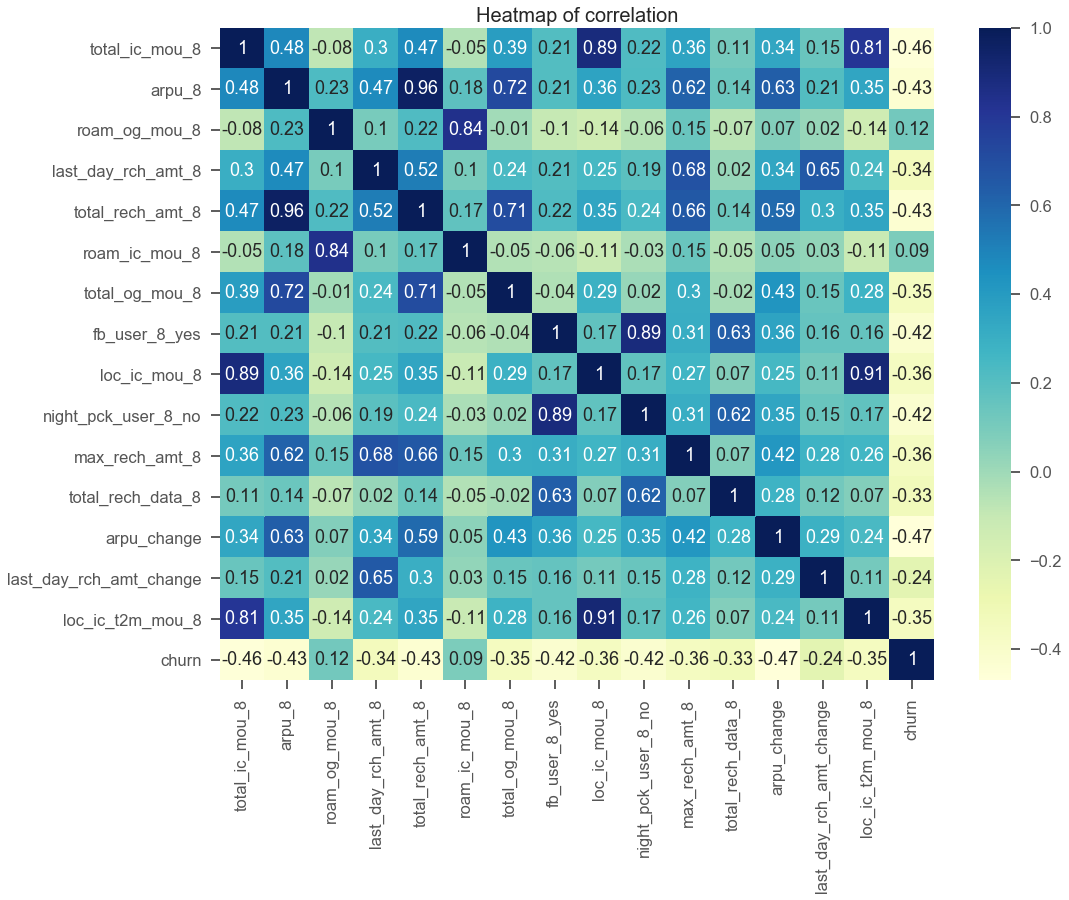

In [117]:
#visualise heatmap of the correlation between columns
plt.figure(figsize=(16, 12))
fig = sns.heatmap(X[np.append(feature_importance.sort_values(by="Significance", ascending=False).head(15).FeatureName.values,'churn')].corr().apply(lambda x: round(x,2)), cmap="YlGnBu", annot=True)
fig.set_title('Heatmap of correlation',fontsize=20)
plt.show()

Churn has a good negative correlation with most of the top columns

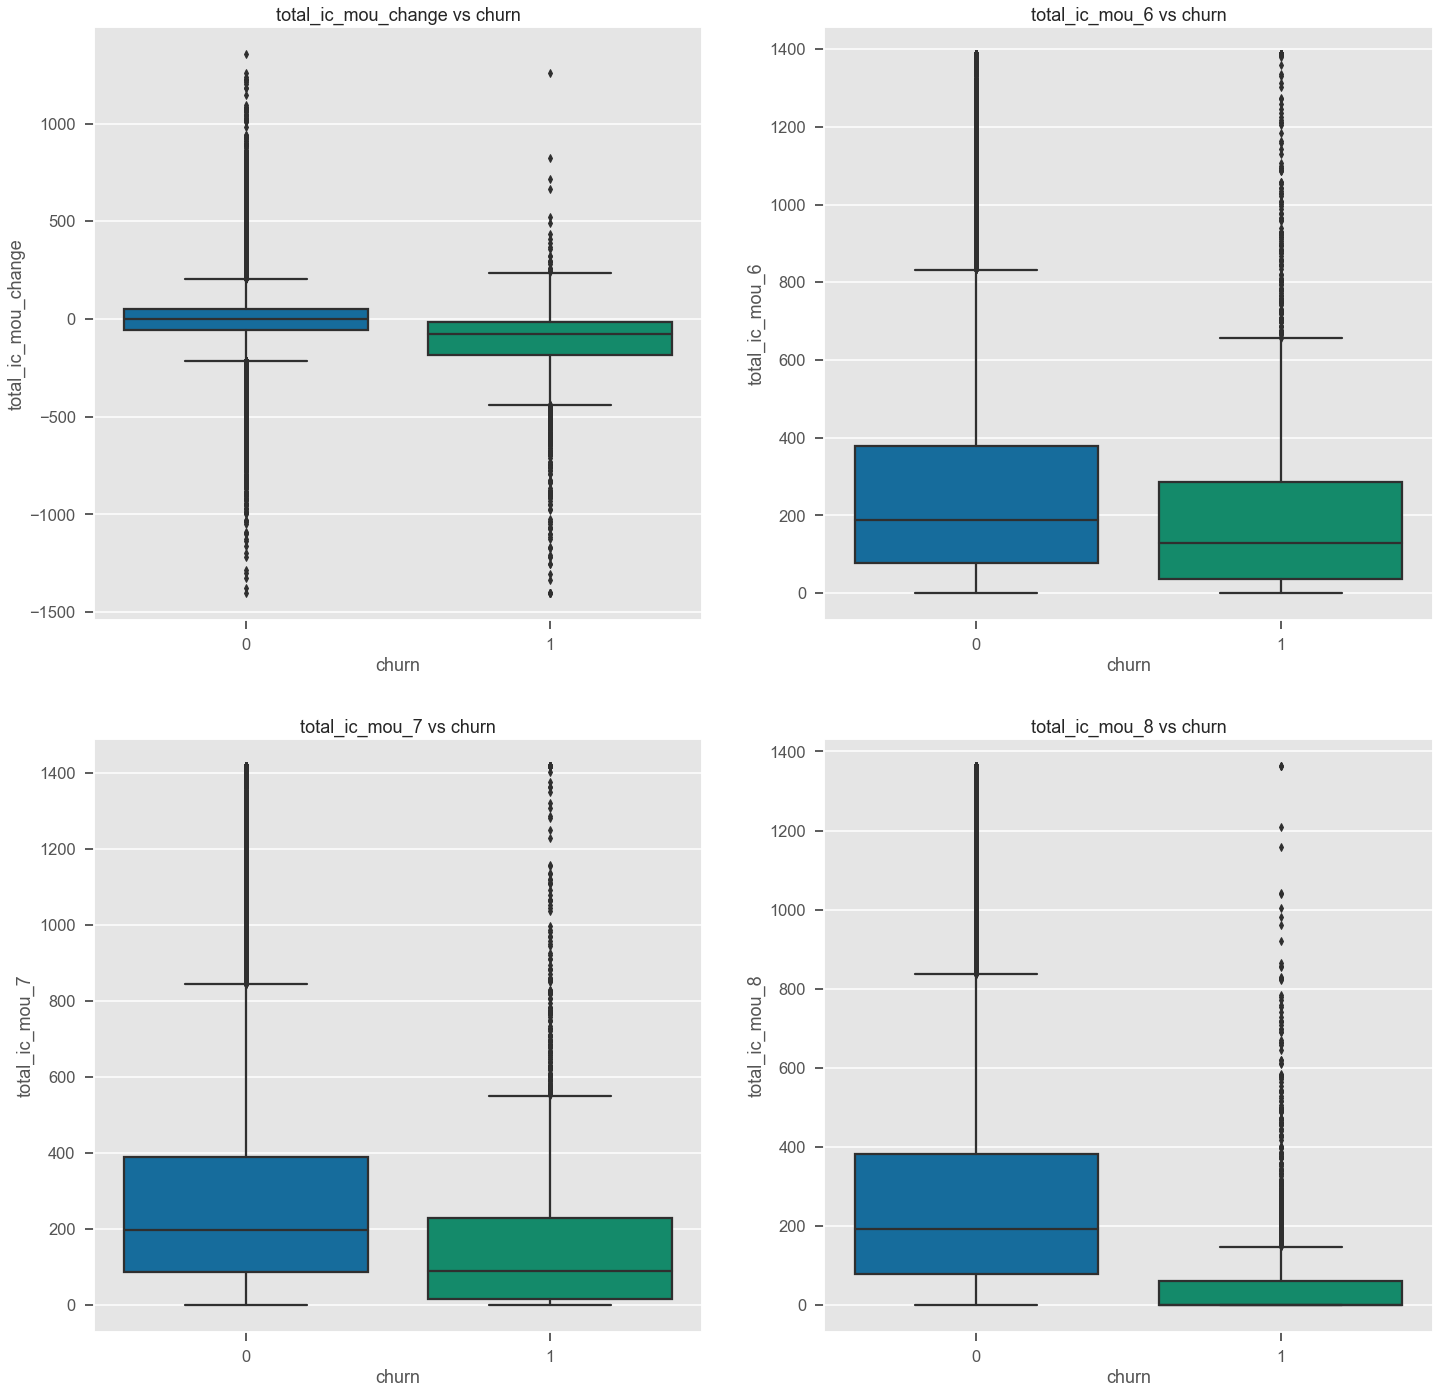

In [118]:
#Check Total Incoming calls vs churn
plotBox('total_ic_mou')
plt.show()

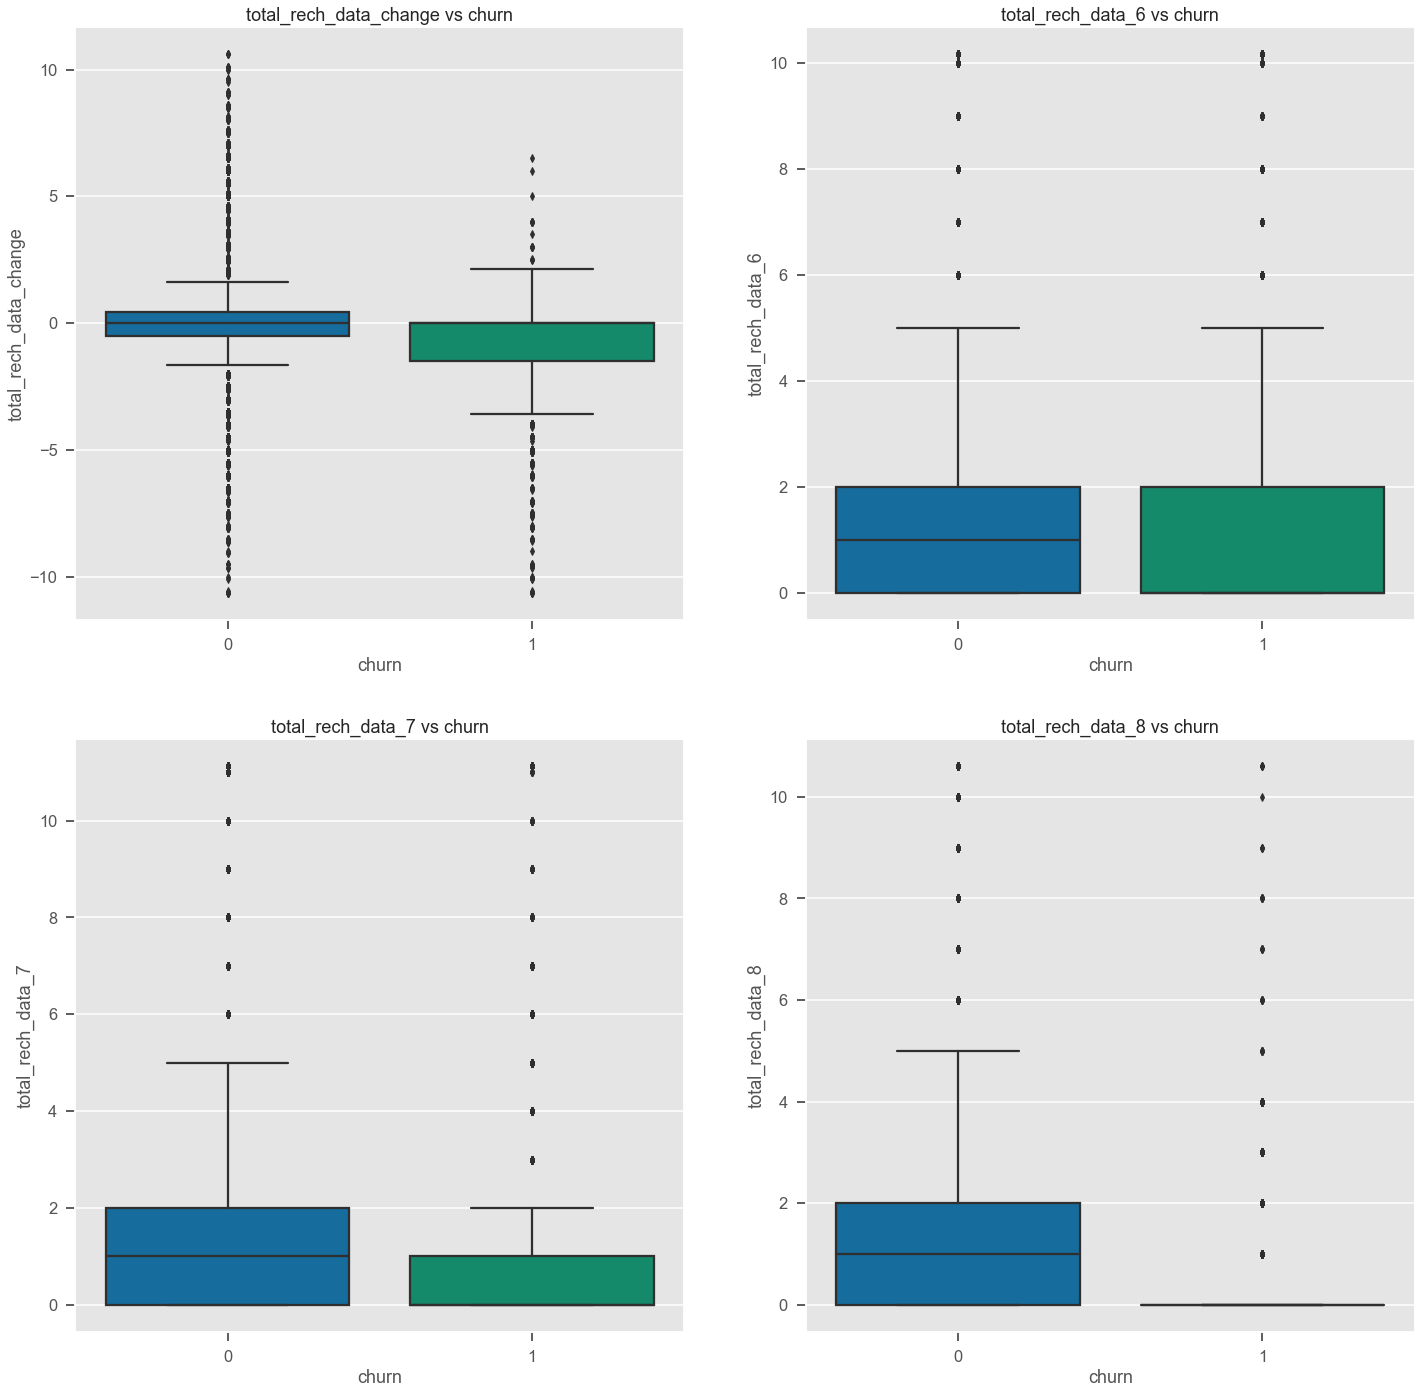

In [119]:
#Check Total Incoming recharge data vs churn
plotBox('total_rech_data')
plt.show()

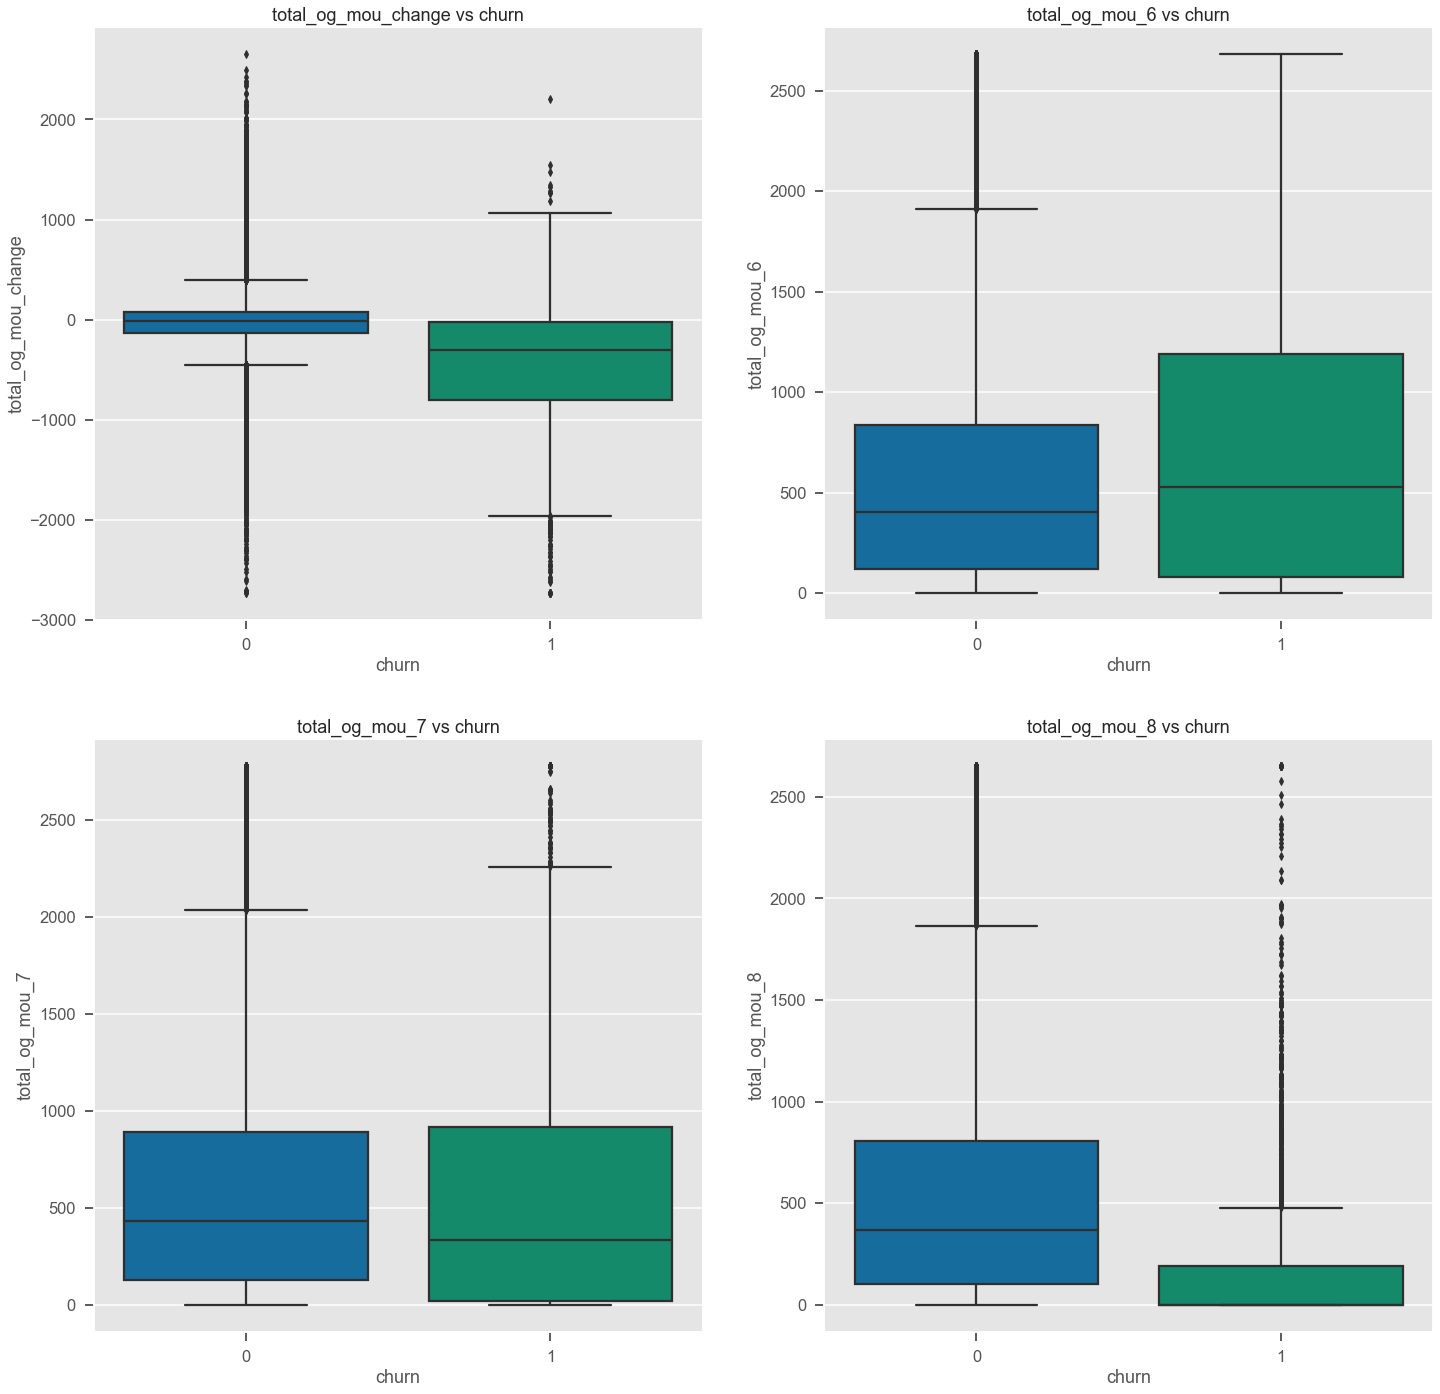

In [120]:
#Check Total outgoing calls vs churn
plotBox('total_og_mou')
plt.show()

As it can be seen from the above graphs, total_ic_mou_8, total_og_mou_8, total_rech_data_8 are really good indicators of churn and as these reduce , the churn rate increases.

## Results

1. **PCA->LogisticRegression:**
    - ***Train:***
        1. Accuracy: 0.84
        2. Sensitivity/Recall: 0.85
        3. ROC_AUC Score: 0.91
    - ***Test:***
        1. Accuracy: 0.85
        2. Sensitivity/Recall: 0.88
        3. ROC_AUC Score: 0.92
        
1. **RandomForestClassifier:**
    - ***Train:***
        1. Accuracy: 0.93
        2. Sensitivity/Recall: 0.93
        3. ROC_AUC Score: 0.98
    - ***Test:***
        1. Accuracy: 0.9
        2. Sensitivity/Recall: 0.87
        3. ROC_AUC Score: 0.96
        
1. **LogisticRegression with topmost significant features:**
    - ***Train:***
        1. Accuracy: 0.82
        2. Sensitivity/Recall: 0.83
        3. ROC_AUC Score: 0.89
    - ***Test:***
        1. Accuracy: 0.83
        2. Sensitivity/Recall: 0.85
        3. ROC_AUC Score: 0.90

**Best Model : RandomForestClassifier**

**Top Features:**
- total_ic_mou_8
- arpu_8
- roam_og_mou_8
- last_day_rch_amt_8
- total_rech_amt_8
- roam_ic_mou_8
- total_og_mou_8
- fb_user_8_yes
- loc_ic_mou_8
- night_pck_user_8_no
- max_rech_amt_8
- total_rech_data_8
- arpu_change

### Inference

In [121]:
feature_coefficients.sort_values(by="Significance", ascending=False)[['FeatureName','coefficients']]

FeatureName  coefficients
0            total_ic_mou_8     -1.664897
9         total_rech_data_8     -0.471490
2            total_og_mou_8     -0.467847
1        last_day_rch_amt_8     -0.450476
6       night_pck_user_8_no     -0.443101
4               arpu_change     -0.406165
5             roam_og_mou_8      0.211593
3          total_rech_amt_8      0.159200
7       total_og_mou_change     -0.144294
10       av_rech_amt_data_8     -0.140715
8   last_day_rch_amt_change     -0.061850

A positive coefficient indicates that the increase in the value cause people to churn.
A Negative coefficient indicates that the increase in the value cause people to not churn.

- Positive Influence:
    1. total_rech_amt_8 -> people who recharge large amount usually churn because the price is too high
    2. roam_og_mou_8 -> As roaming outgoing calls increase , the churn increases as either the price is too high or they are continuously talking with the customer care.


- Negative Influence:
    1. total_ic_mou_8 -> Higher incoming calls indicate the customer is happy with the service hence no churn.
    2. total_og_mou_8 -> Higher outgoing calls indicate the customer is happy with the service hence no churn.
    3. arpu_change -> As Arpu decreases, the churn rate increases.
    
A customer about to churn will have the following indicators:
    - Total Recharge Amount -> HIGH
    - Roaming Outgoing calls -> HIGH
    - Total Incoming calls -> LOW
    - ARPU  -> Low/Reduced
    - Total Outgoing calls -> LOW

The trend is similar for remaining coefficients.

##### Business Suggestions

- The Business can give discounts outgoing,ingoming calls.
- The customer with reducing ARPU can be given special offers for a couple of months.
- night_packs and fb_users can be given special offers.
- The customer should be a given an option to have smaller recharge amounts.